In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scripts.gestion_donnees.pretraitement import Pretraitement
from scripts.evaluation.evaluation_model import Evaluation
from scripts.classifieurs.forets_aleatoires import Forets_aleatoires
from scripts.classifieurs.reseaux_de_neurones import Reseaux_de_neurones
from scripts.classifieurs.arbre_de_decision import Arbre_de_decision
from scripts.classifieurs.svm import SVM_Classificateur
from scripts.classifieurs.adaboost import AdaBoost_model
from scripts.classifieurs.bagging import Bagging
from scripts.classifieurs.knn import Knn 
from scripts.classifieurs.logistic_regression import LogisticRegression_model
from scripts.classifieurs.perceptron import Perceptron_model
from sklearn.ensemble import RandomForestClassifier

## Partie 1 :  Prétraitement et analyse des données

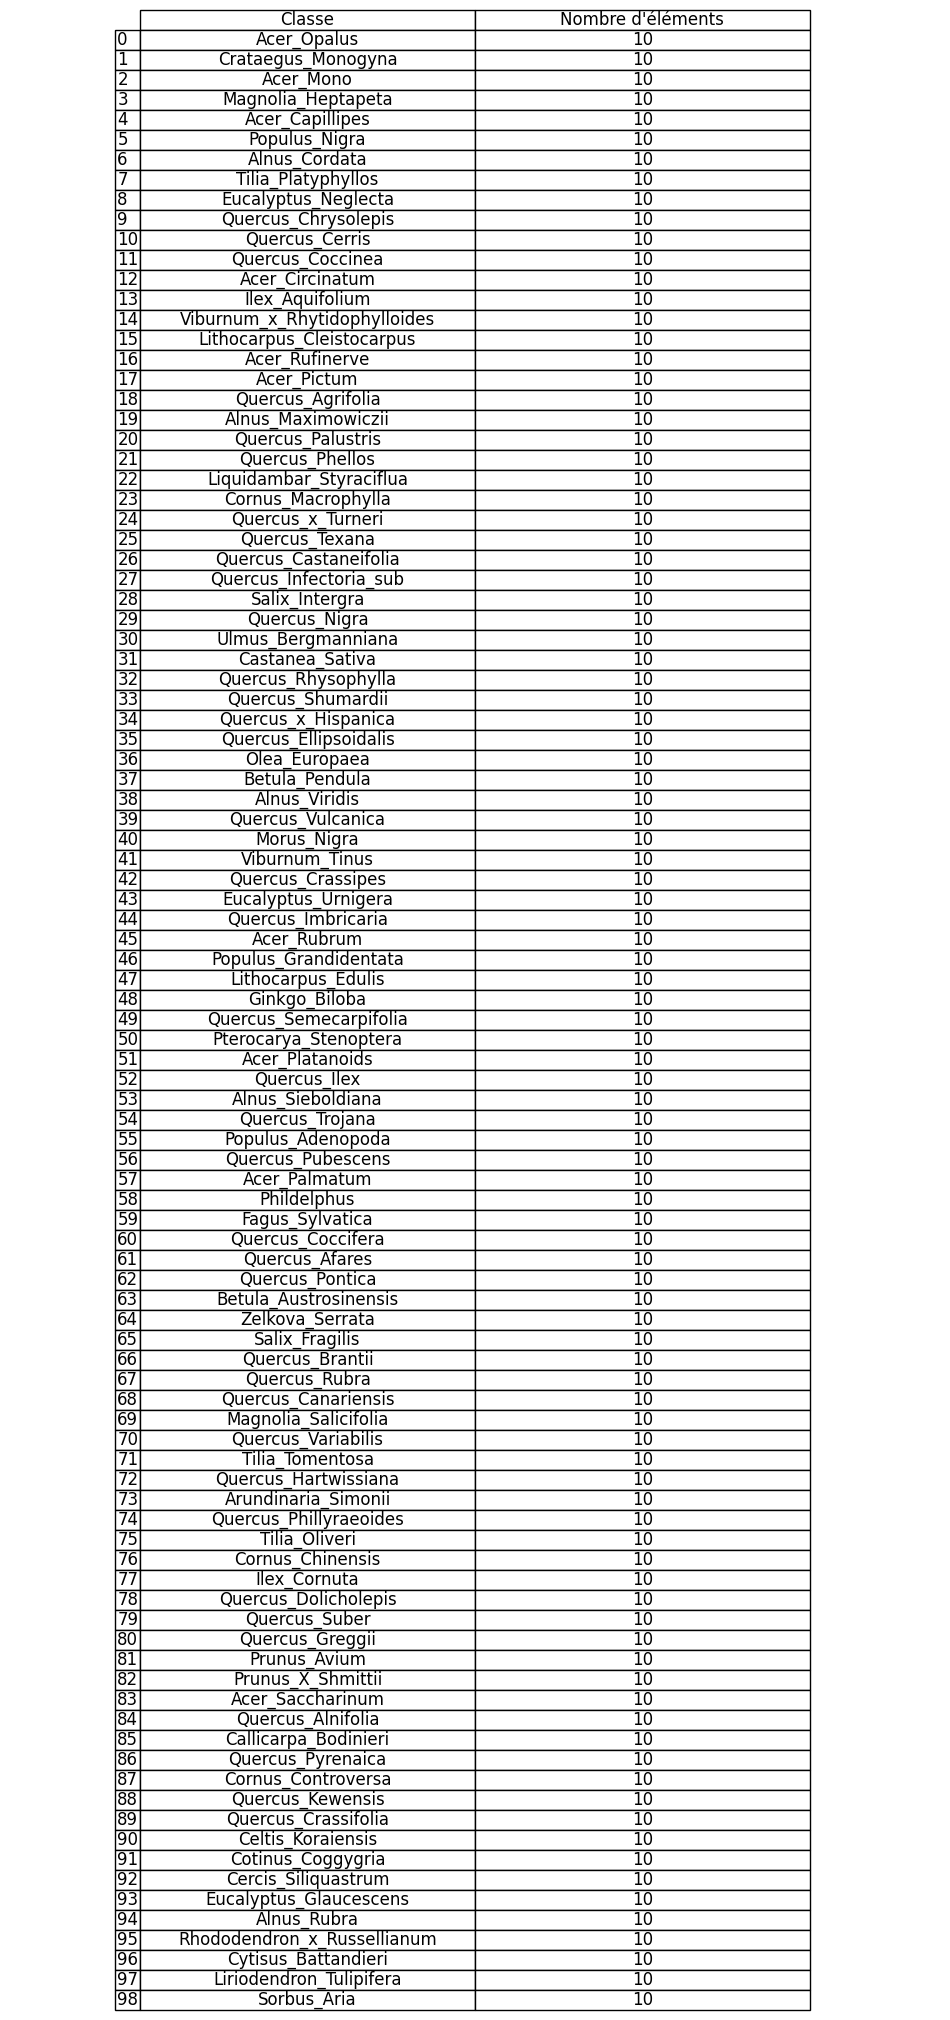

In [ ]:
# creation des instances
Ev = Evaluation
Pt = Pretraitement("./data/train.csv")
#  charger donneés entrainement
df_train_init = Pt.Charger_donnees()
# Nombres d'elements par classe
Pt.plot_class_distribution(df_train_init, 'species')
# encoder donneés
etiquette,classes = Pt.Encoder_donnees(df_train_init,"species")
df_train_init = df_train_init.drop(['id','species'], axis=1)
# supprimer les valeurs aberrantes
outliers = Pt.Indice_outliers(df_train_init,3.0)
df_train = df_train_init.drop(outliers)
etiquette = [etiquette[i] for i in range(len(etiquette)) if i not in outliers]
# diviser les donnees
x_train, x_test, y_train, y_test, x_val, y_val = Pt.Diviser_donnees(df_train,etiquette)

Le nombre de données redondantes de train est 0
Nb valeur manquante train 0
99


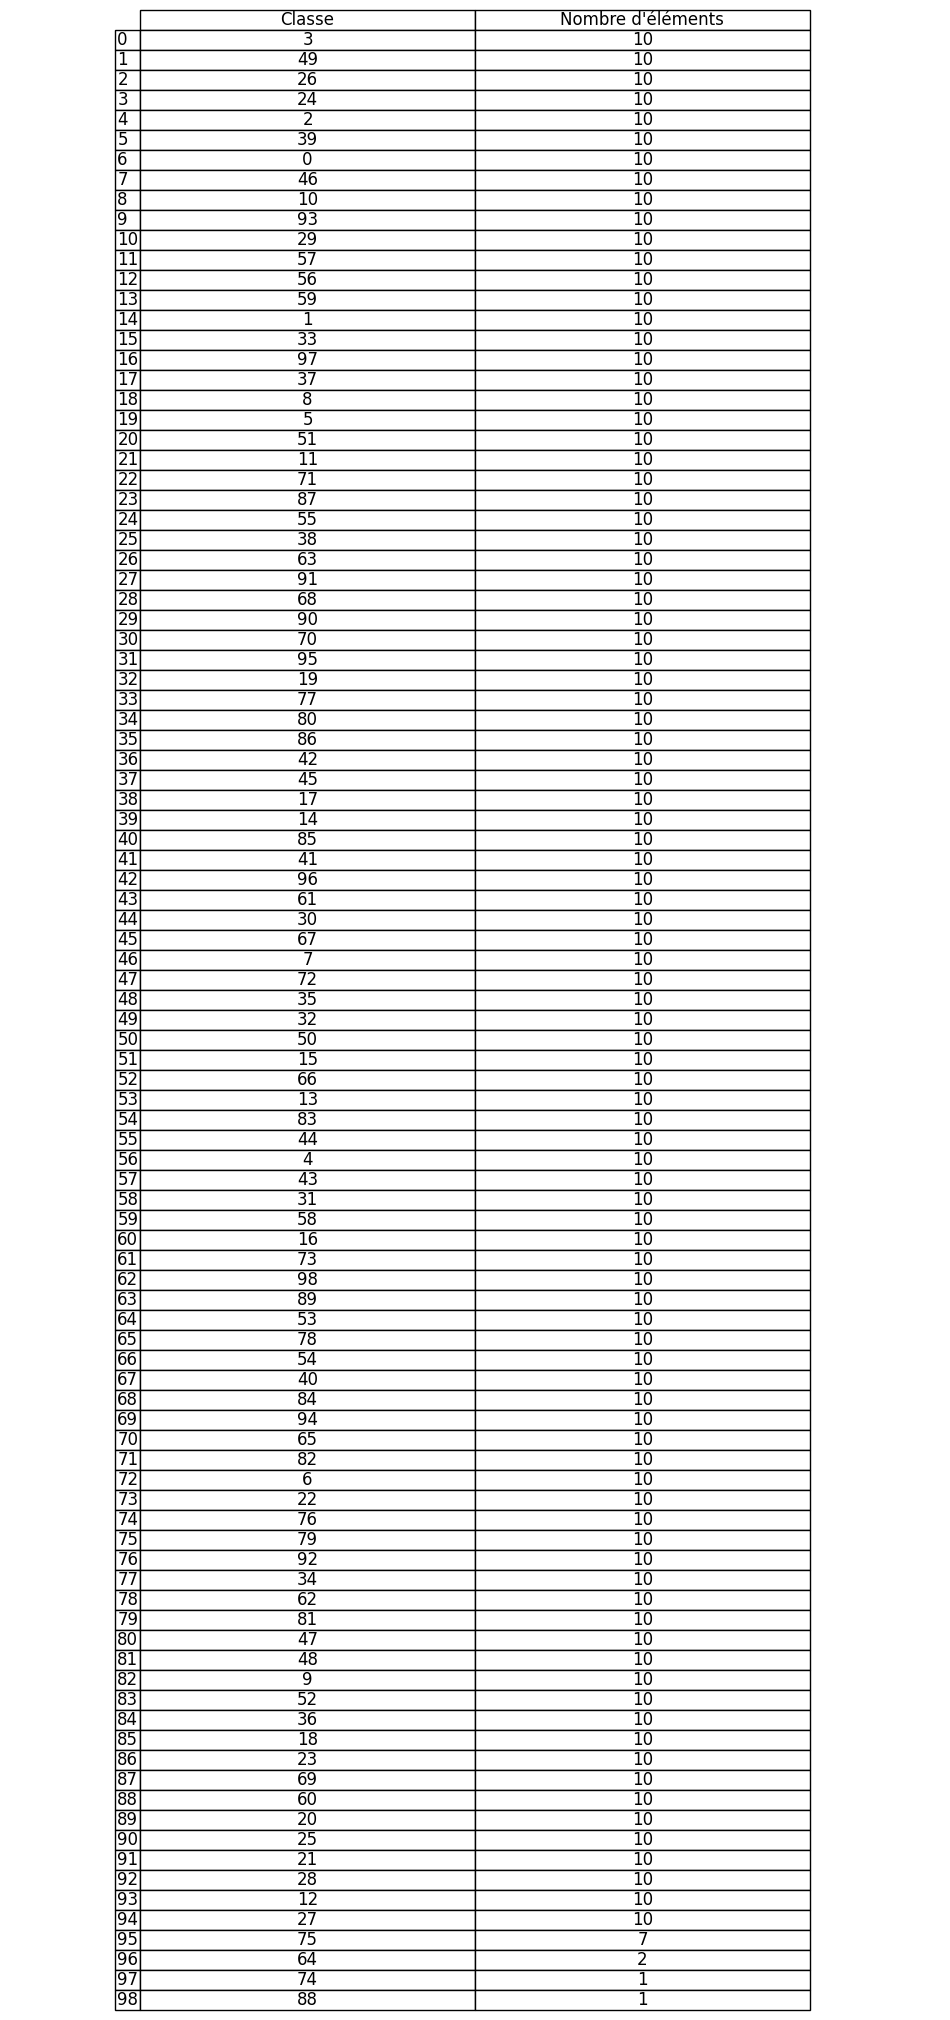

In [ ]:
#vérifie la redondance des datas
print("Le nombre de données redondantes de train est " + str(df_train.duplicated().sum()))
#vérifie si pour un des attributs il manque une valeur
print("Nb valeur manquante train " + str(df_train.isnull().any().sum()))
#
unique_elements = set(etiquette)

n_classes = len(unique_elements)
print(n_classes)

# Nombres d'elements par classe aprés suppression des outliers
df_train['species'] = etiquette
Pt.plot_class_distribution(df_train, 'species')

In [ ]:
df_train_init

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0    0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1    0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   
2    0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359   
3    0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438   
4    0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859   
..        ...       ...       ...       ...       ...       ...       ...   
985  0.060547  0.119140  0.007812  0.003906  0.000000  0.148440  0.017578   
986  0.001953  0.003906  0.021484  0.107420  0.001953  0.000000  0.000000   
987  0.001953  0.003906  0.000000  0.021484  0.078125  0.003906  0.007812   
988  0.000000  0.000000  0.046875  0.056641  0.009766  0.000000  0.000000   
989  0.023438  0.019531  0.031250  0.015625  0.005859  0.019531  0.035156   

     margin8   margin9  margin10  ...  texture55  texture56  texture57  \
0        0.0  0.001953  0.033203  ...   0.007812   0.000000   0.002930   
1        0.0  0.000000  0.007812  ...   0.000977   0.000000   0.000000   
2        0.0  0.000000  0.044922  ...   0.154300   0.000000   0.005859   
3        0.0  0.013672  0.017578  ...   0.000000   0.000977   0.000000   
4        0.0  0.000000  0.005859  ...   0.096680   0.000000   0.021484   
..       ...       ...       ...  ...        ...        ...        ...   
985      0.0  0.001953  0.042969  ...   0.242190   0.000000   0.034180   
986      0.0  0.029297  0.003906  ...   0.170900   0.000000   0.018555   
987      0.0  0.003906  0.000000  ...   0.004883   0.000977   0.004883   
988      0.0  0.037109  0.001953  ...   0.083008   0.030273   0.000977   
989      0.0  0.003906  0.039062  ...   0.000000   0.000000   0.002930   

     texture58  texture59  texture60  texture61  texture62  texture63  \
0     0.002930   0.035156   0.000000   0.000000   0.004883   0.000000   
1     0.000977   0.023438   0.000000   0.000000   0.000977   0.039062   
2     0.000977   0.007812   0.000000   0.000000   0.000000   0.020508   
3     0.000000   0.020508   0.000000   0.000000   0.017578   0.000000   
4     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
..         ...        ...        ...        ...        ...        ...   
985   0.000000   0.010742   0.000000   0.000000   0.000000   0.000000   
986   0.000000   0.011719   0.000000   0.000000   0.000977   0.000000   
987   0.027344   0.016602   0.007812   0.000000   0.027344   0.000000   
988   0.002930   0.014648   0.000000   0.041992   0.000000   0.001953   
989   0.000000   0.012695   0.000000   0.000000   0.023438   0.025391   

     texture64  
0     0.025391  
1     0.022461  
2     0.002930  
3     0.047852  
4     0.031250  
..         ...  
985   0.018555  
986   0.021484  
987   0.001953  
988   0.002930  
989   0.022461  

[990 rows x 192 columns]

In [ ]:
df_train

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0    0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1    0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   
2    0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359   
3    0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438   
4    0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859   
..        ...       ...       ...       ...       ...       ...       ...   
985  0.060547  0.119140  0.007812  0.003906  0.000000  0.148440  0.017578   
986  0.001953  0.003906  0.021484  0.107420  0.001953  0.000000  0.000000   
987  0.001953  0.003906  0.000000  0.021484  0.078125  0.003906  0.007812   
988  0.000000  0.000000  0.046875  0.056641  0.009766  0.000000  0.000000   
989  0.023438  0.019531  0.031250  0.015625  0.005859  0.019531  0.035156   

     margin8   margin9  margin10  ...  texture56  texture57  texture58  \
0        0.0  0.001953  0.033203  ...   0.000000   0.002930   0.002930   
1        0.0  0.000000  0.007812  ...   0.000000   0.000000   0.000977   
2        0.0  0.000000  0.044922  ...   0.000000   0.005859   0.000977   
3        0.0  0.013672  0.017578  ...   0.000977   0.000000   0.000000   
4        0.0  0.000000  0.005859  ...   0.000000   0.021484   0.000000   
..       ...       ...       ...  ...        ...        ...        ...   
985      0.0  0.001953  0.042969  ...   0.000000   0.034180   0.000000   
986      0.0  0.029297  0.003906  ...   0.000000   0.018555   0.000000   
987      0.0  0.003906  0.000000  ...   0.000977   0.004883   0.027344   
988      0.0  0.037109  0.001953  ...   0.030273   0.000977   0.002930   
989      0.0  0.003906  0.039062  ...   0.000000   0.002930   0.000000   

     texture59  texture60  texture61  texture62  texture63  texture64  species  
0     0.035156   0.000000   0.000000   0.004883   0.000000   0.025391        3  
1     0.023438   0.000000   0.000000   0.000977   0.039062   0.022461       49  
2     0.007812   0.000000   0.000000   0.000000   0.020508   0.002930       65  
3     0.020508   0.000000   0.000000   0.017578   0.000000   0.047852       94  
4     0.000000   0.000000   0.000000   0.000000   0.000000   0.031250       84  
..         ...        ...        ...        ...        ...        ...      ...  
985   0.010742   0.000000   0.000000   0.000000   0.000000   0.018555       40  
986   0.011719   0.000000   0.000000   0.000977   0.000000   0.021484        5  
987   0.016602   0.007812   0.000000   0.027344   0.000000   0.001953       11  
988   0.014648   0.000000   0.041992   0.000000   0.001953   0.002930       78  
989   0.012695   0.000000   0.000000   0.023438   0.025391   0.022461       50  

[961 rows x 193 columns]

## Partie 2 : Modélisation et évaluation des données

##### Forets aléatoires

In [ ]:
model_foret_alea = Forets_aleatoires(x_train, y_train, x_val, y_val,x_test,y_test)
model_foret_alea.validation_croisee_gridsearch()
model_foret_alea.entrainement()
predictions = model_foret_alea.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.9845, Precision: 0.9872, Recall: 0.9845


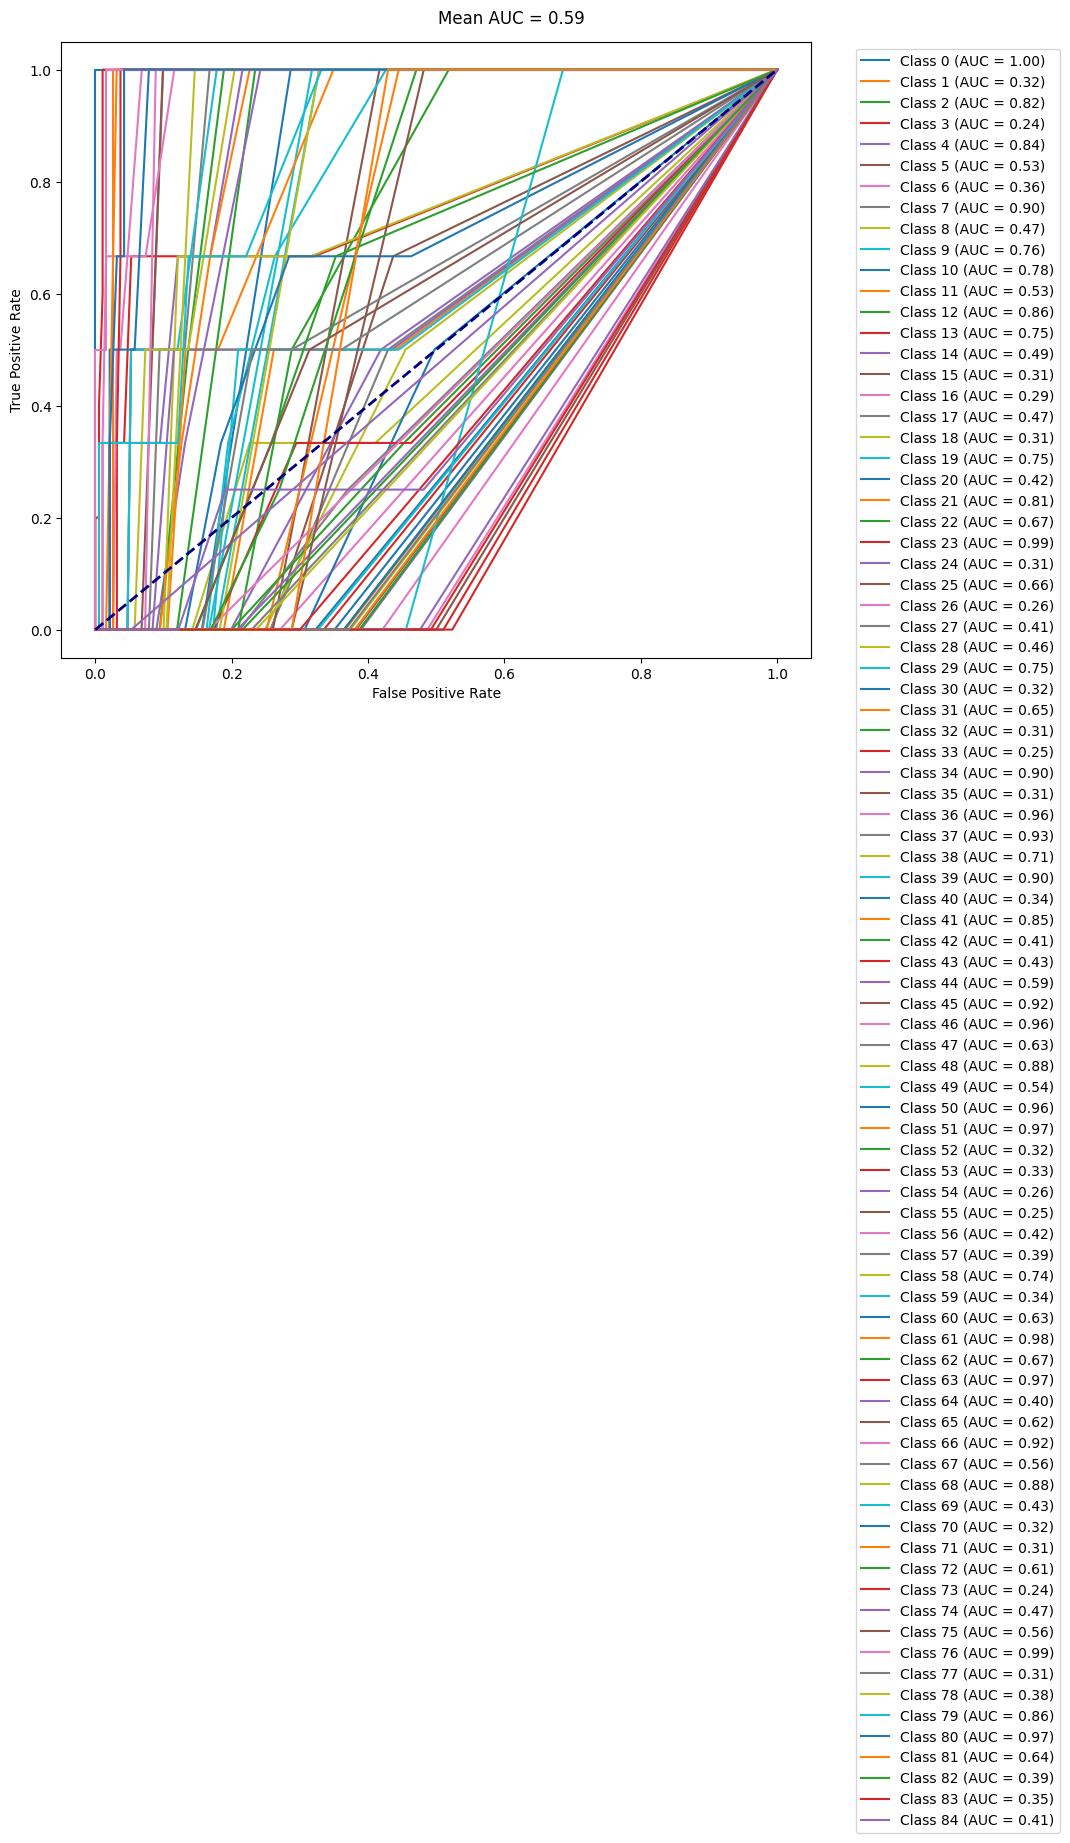

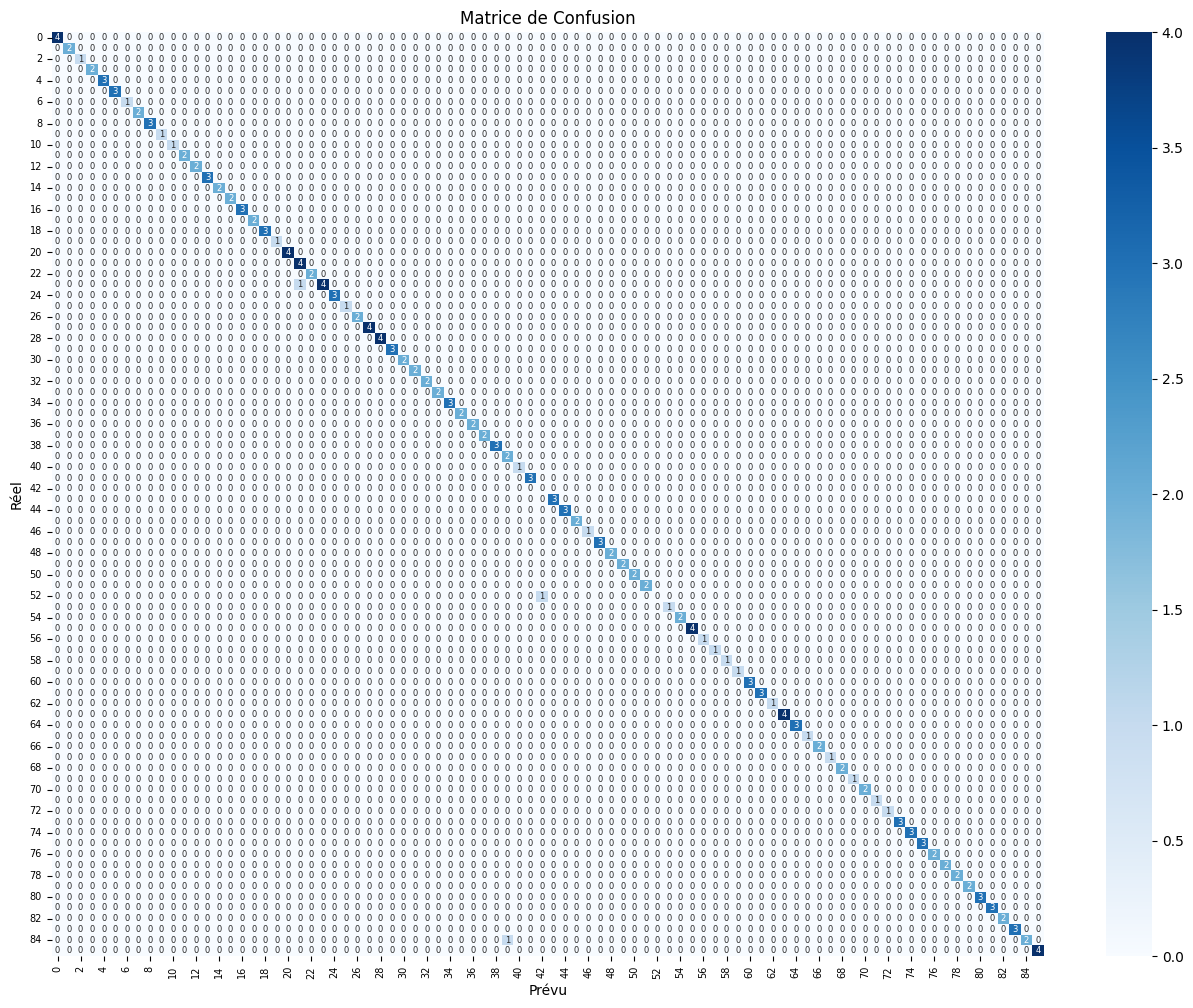

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         

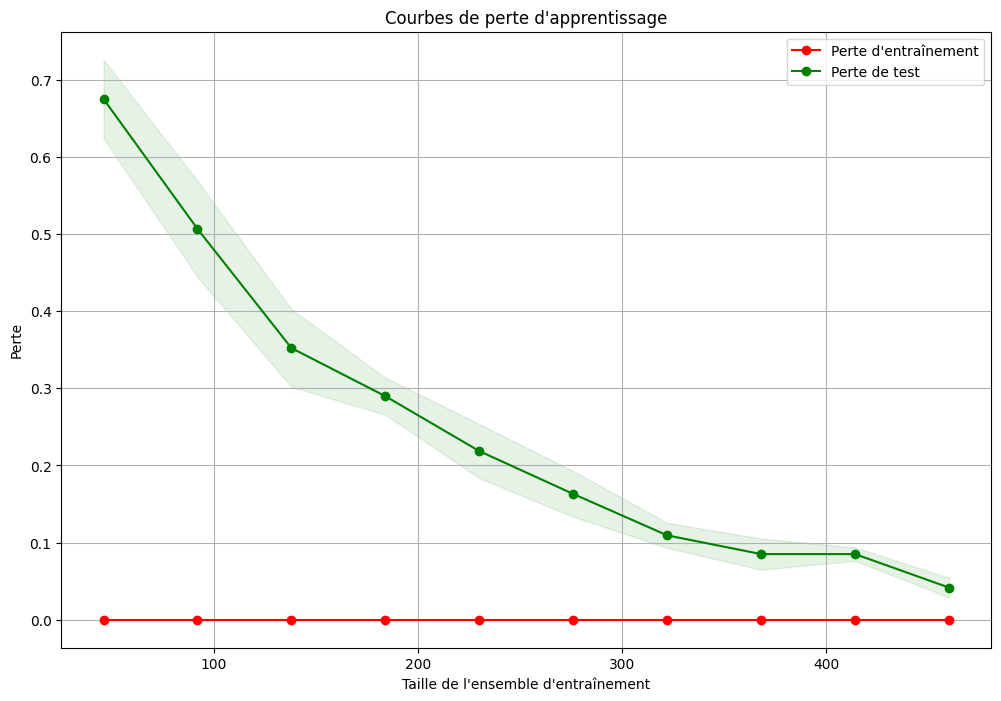

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


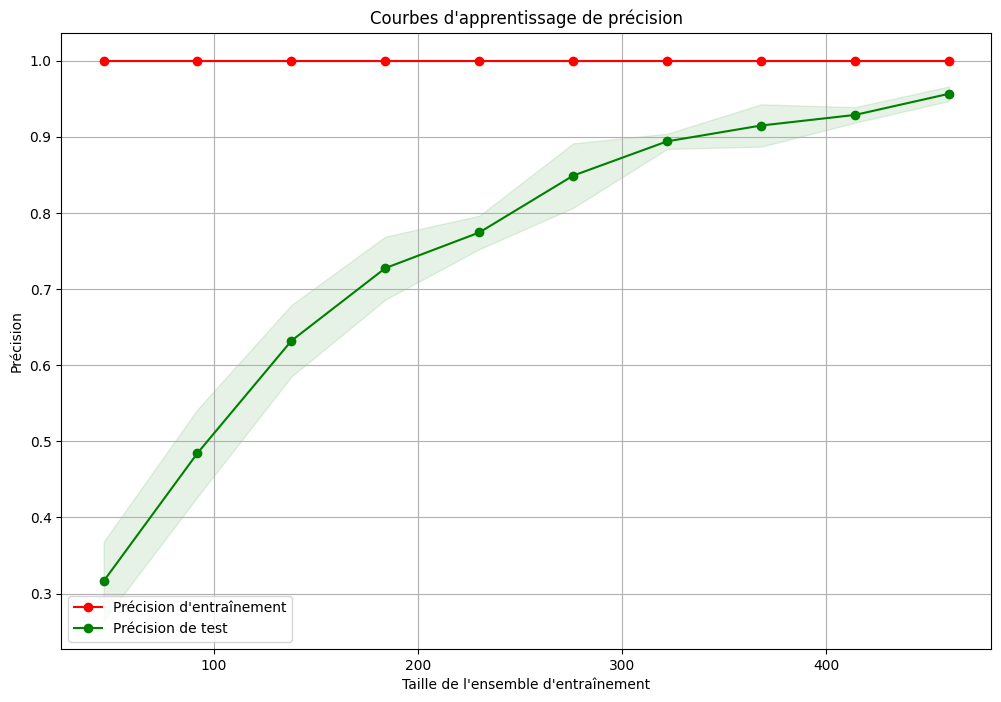

In [ ]:
evaluation_fa= Evaluation(model=model_foret_alea.rf_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation_fa.calculate_metrics(model_foret_alea.y_test, model_foret_alea.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_fa.plt_roc_curve()
evaluation_fa.plt_confusion_matrix()
evaluation_fa.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_fa.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_fa.plot_learning_curves_accuracy(train_sizes=train_sizes)

##### SVM

In [ ]:
svm_model = SVM_Classificateur(x_train, y_train, x_val, y_val, x_test, y_test)
svm_model.validation_croisee_gridsearch()
svm_model.entrainement()
predictions_svm = svm_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7194, Precision: 0.7891, Recall: 0.7254


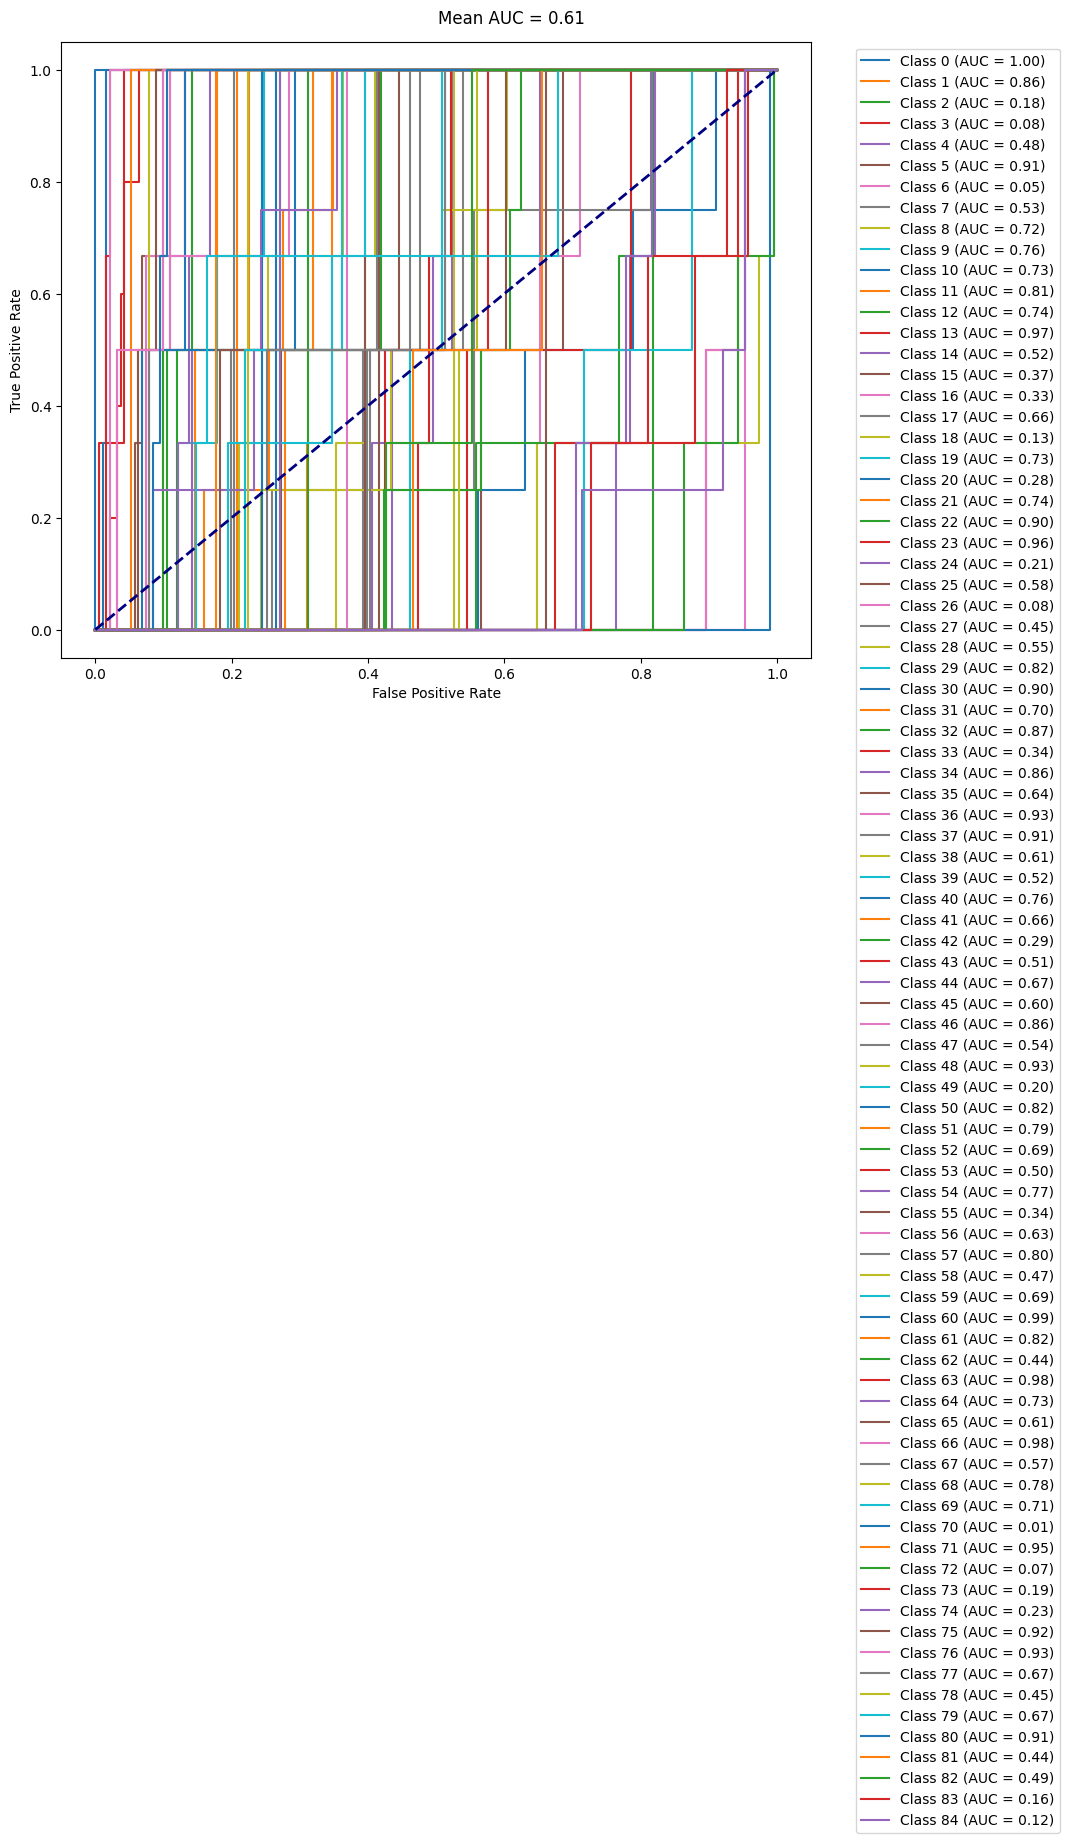

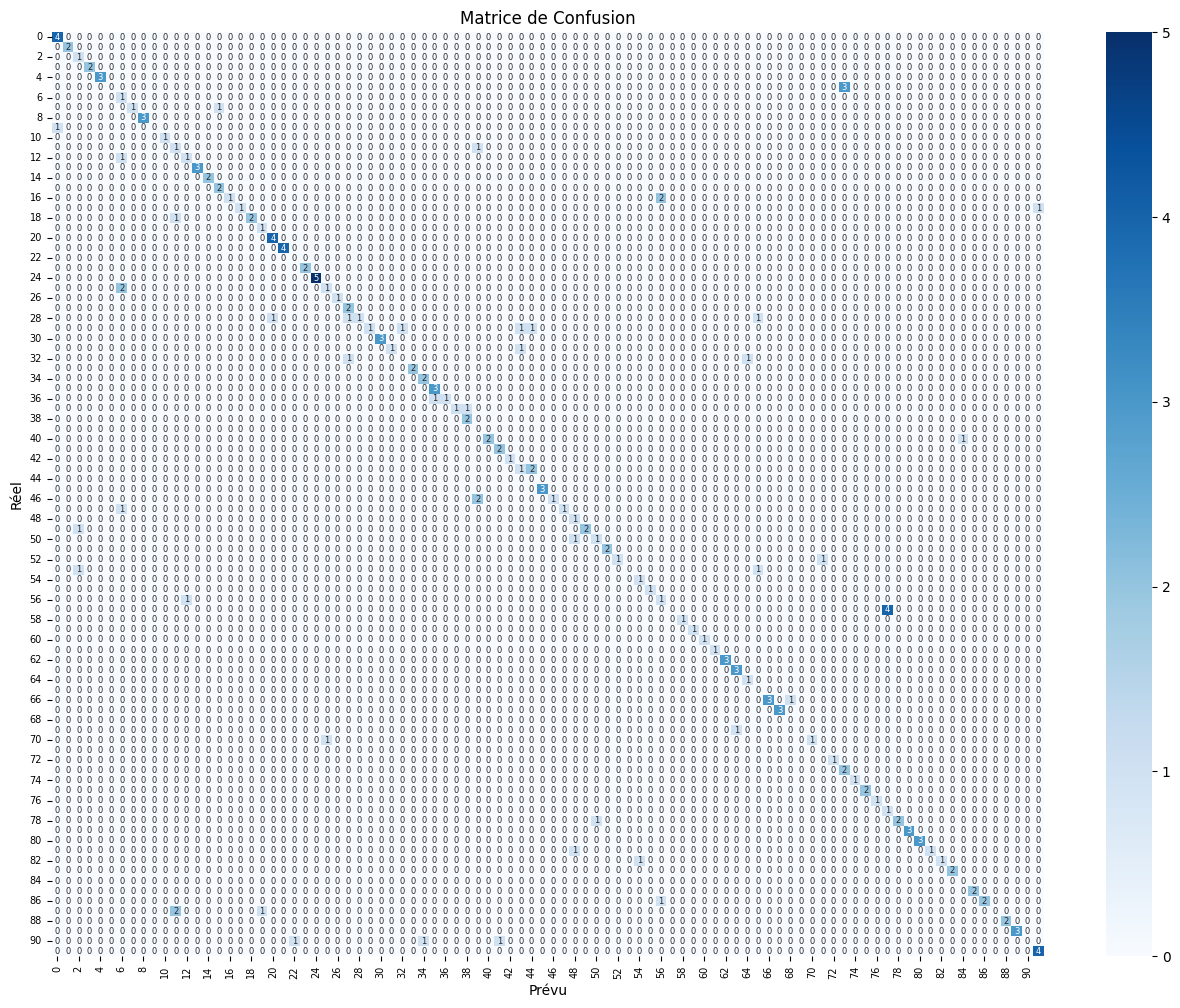

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         3
           7       0.20      1.00      0.33         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.25      0.50      0.33         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      0.33      0.50         

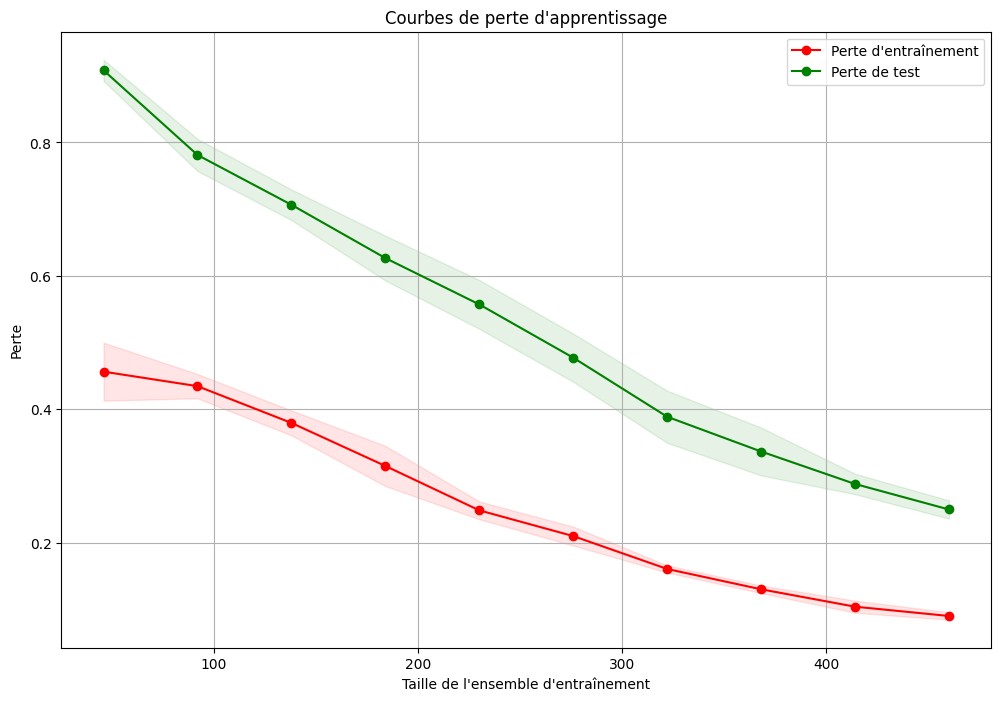

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


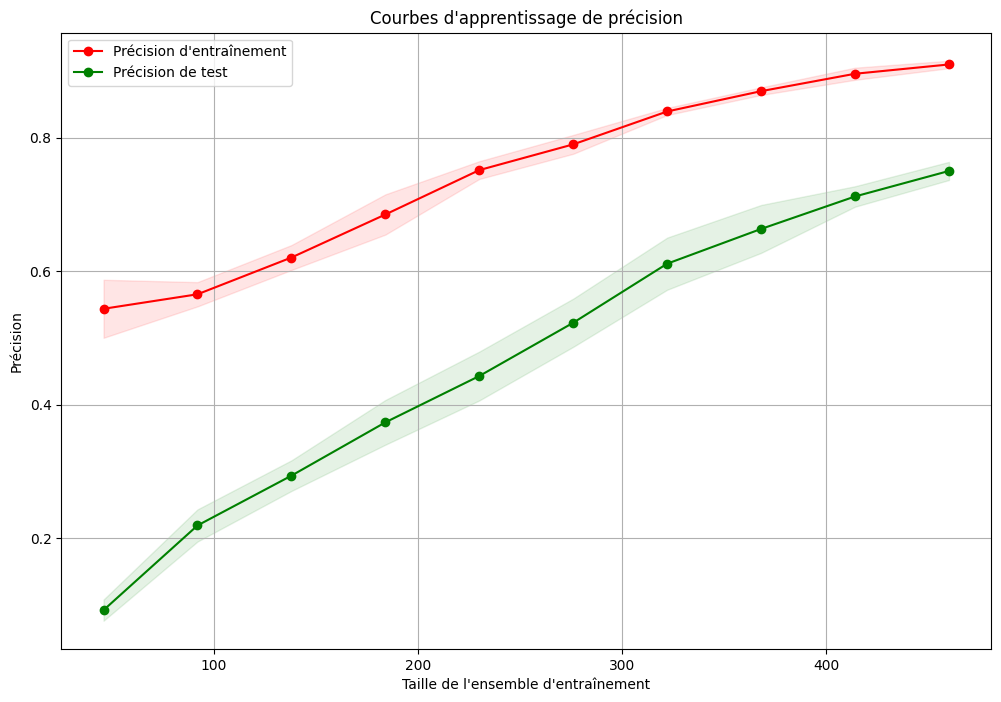

In [ ]:
evaluation_svm = Evaluation(svm_model.svm_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_svm.calculate_metrics(evaluation_svm.y_test, predictions_svm)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_svm.plt_roc_curve()
evaluation_svm.plt_confusion_matrix()
evaluation_svm.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_svm.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_svm.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Arbre de decision

In [ ]:
Arbre_de_decision_model = Arbre_de_decision(x_train, y_train, x_val, y_val, x_test, y_test)
Arbre_de_decision_model.validation_croisee_gridsearch()
Arbre_de_decision_model.entrainement()
predictions = Arbre_de_decision_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


F1 Score: 0.5270, Precision: 0.5624, Recall: 0.5389


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


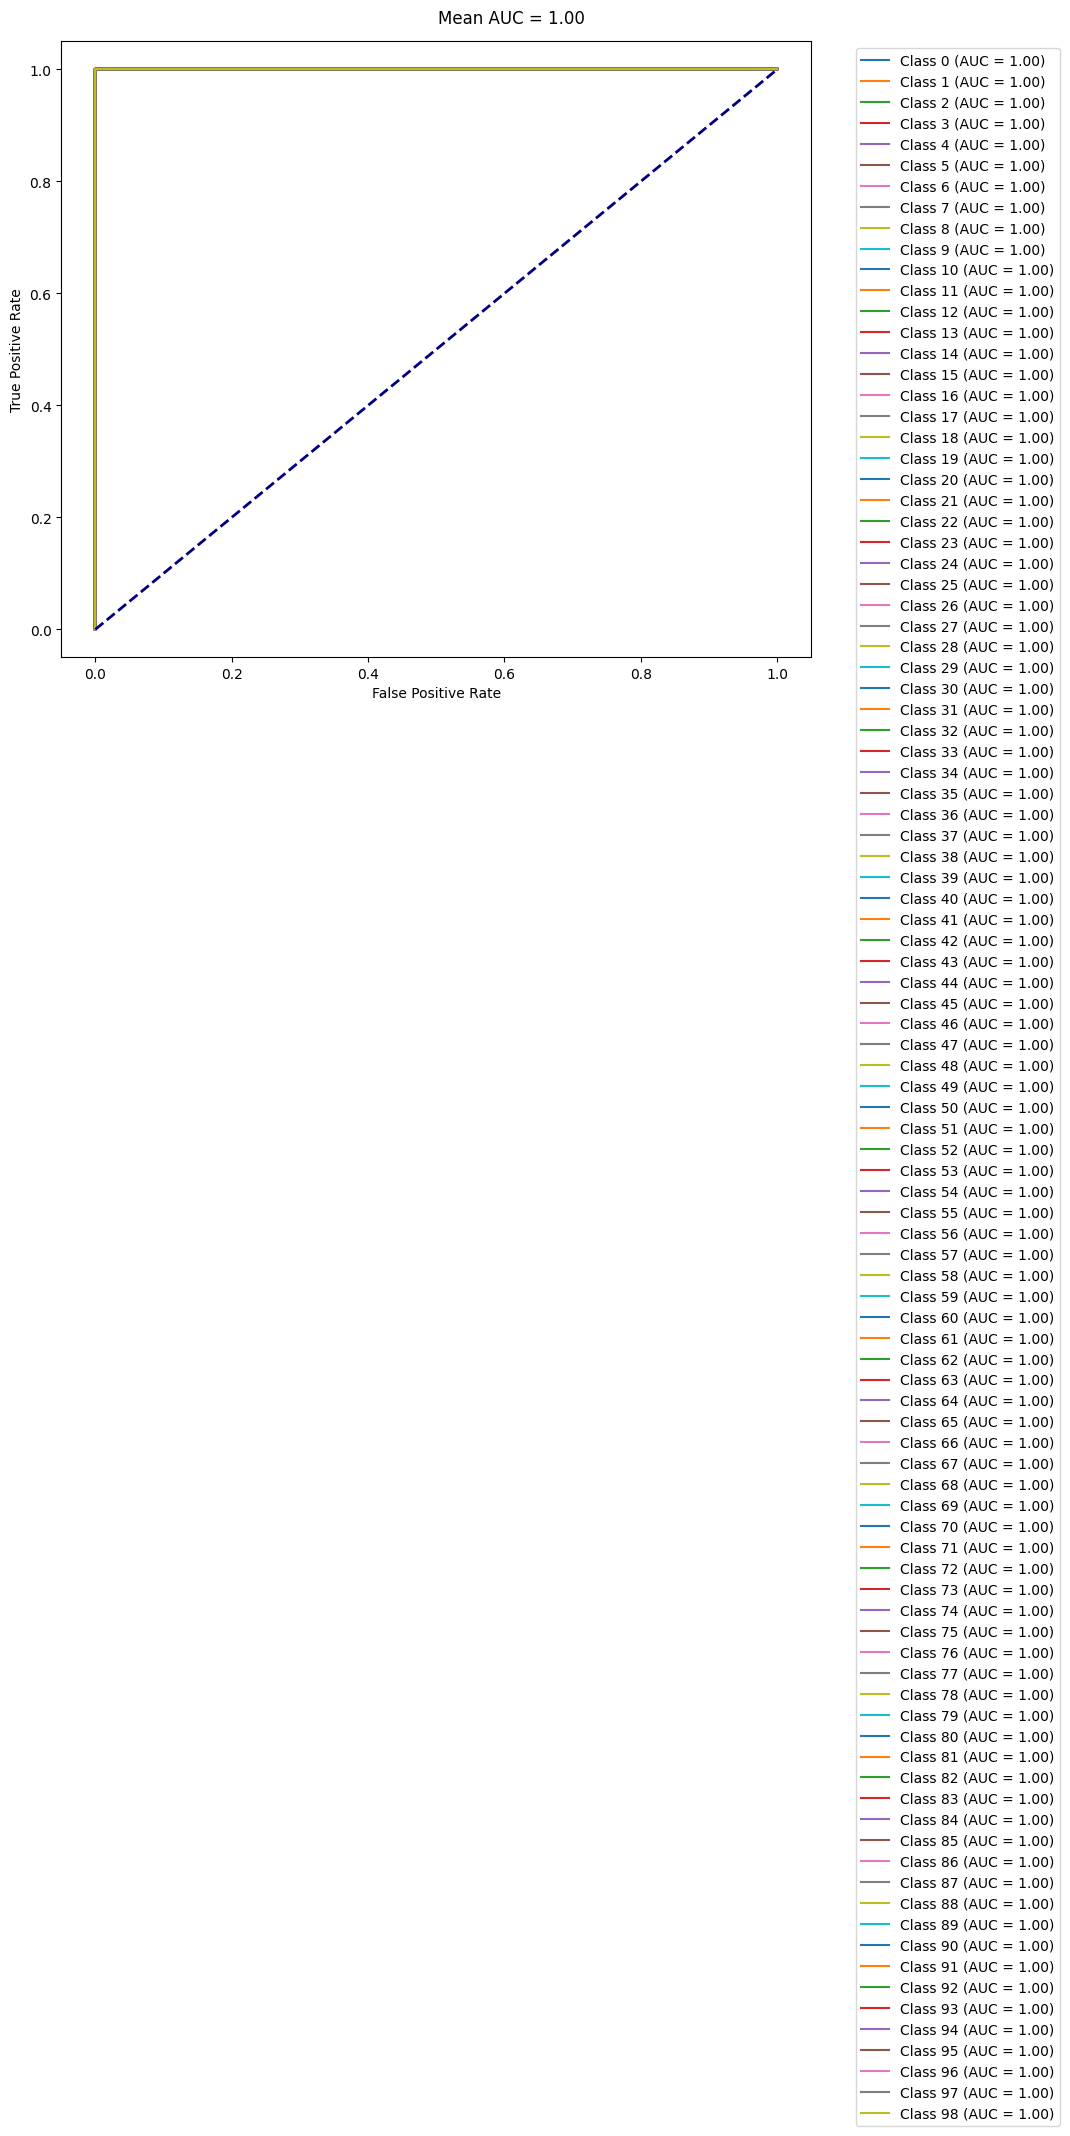

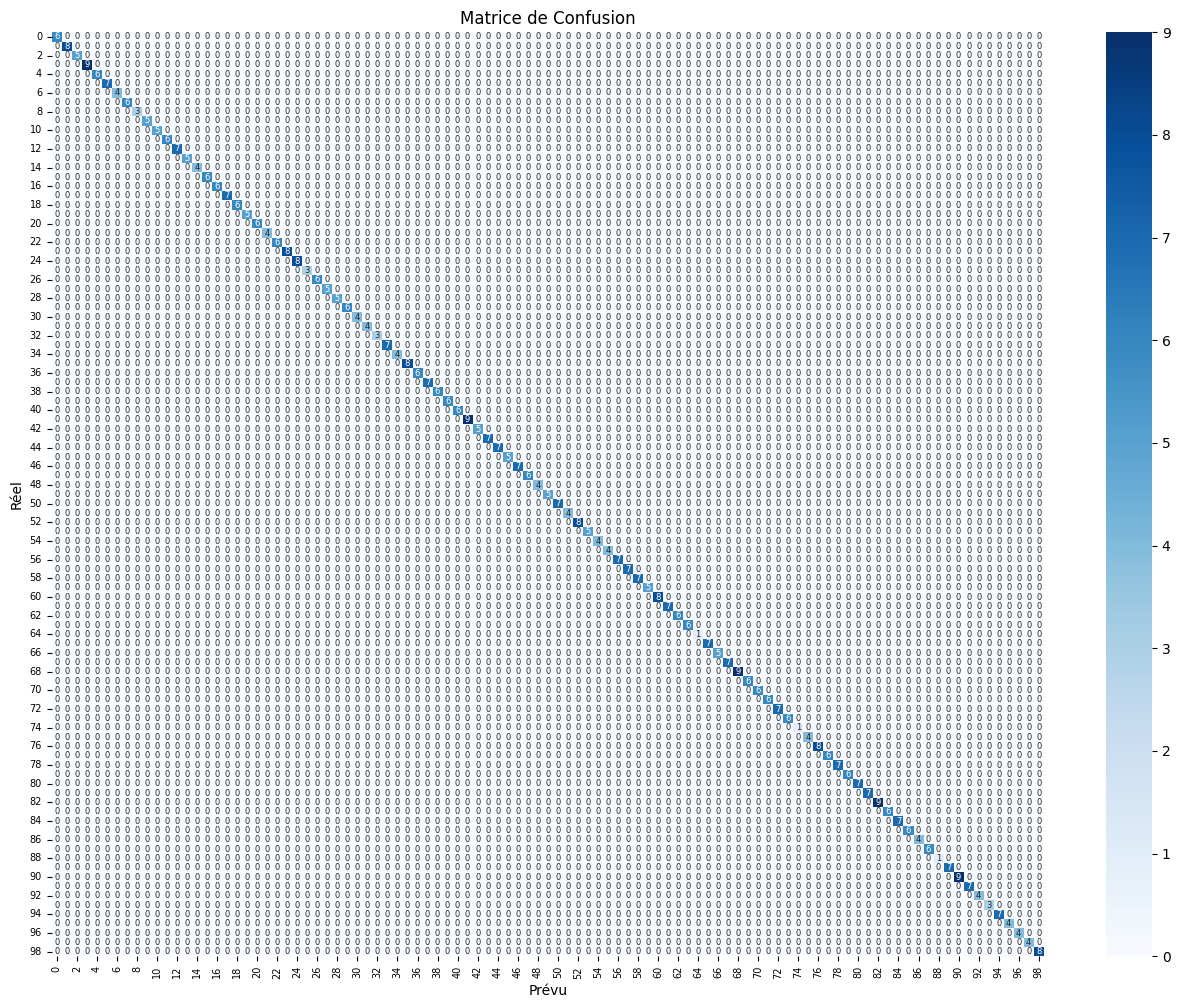

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


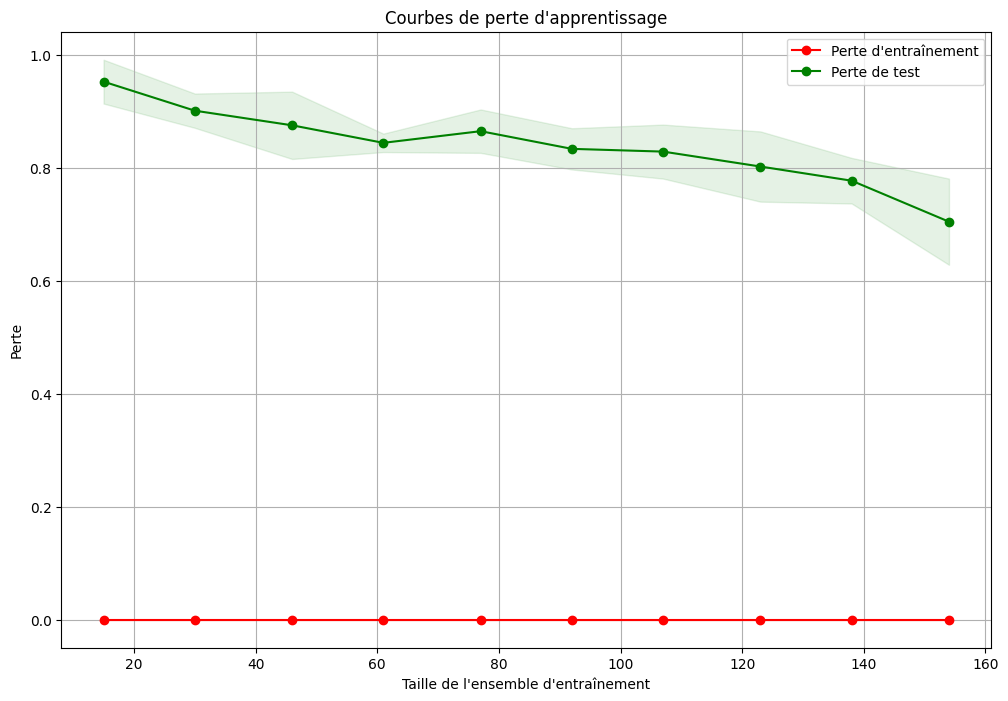

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


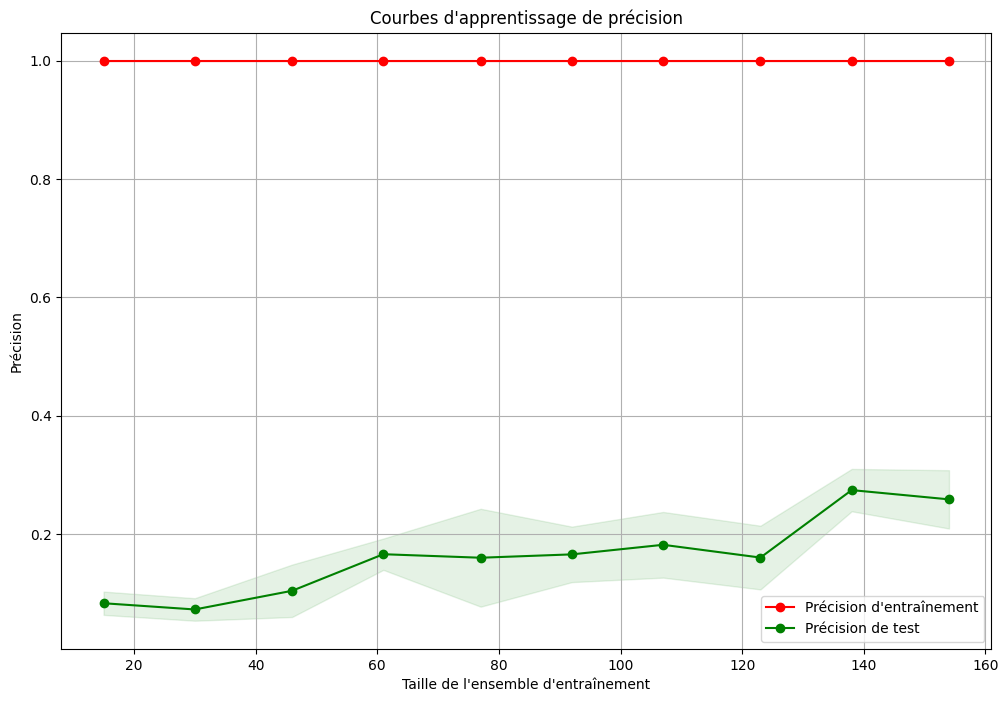

In [ ]:
evaluation_dt = Evaluation(Arbre_de_decision_model.dt_classifier, Arbre_de_decision_model.x_test, Arbre_de_decision_model.y_test,Arbre_de_decision_model.x_train,Arbre_de_decision_model.y_train)
f1, precision, recall = evaluation_dt.calculate_metrics(Arbre_de_decision_model.y_test, Arbre_de_decision_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_dt.plt_roc_curve()
evaluation_dt.plt_confusion_matrix()
evaluation_dt.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_dt.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Ada boosting


In [ ]:
adaboost_model = AdaBoost_model(x_train, y_train, x_val, y_val, x_test, y_test)
adaboost_model.validation_croisee_gridsearch()
adaboost_model.entrainement()
predictions = adaboost_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=6), 'learning_rate': 0.01, 'n_estimators': 50}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=6), 'learning_rate': 0.01, 'n_estimators': 50}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.3988, Precision: 0.4243, Recall: 0.4352


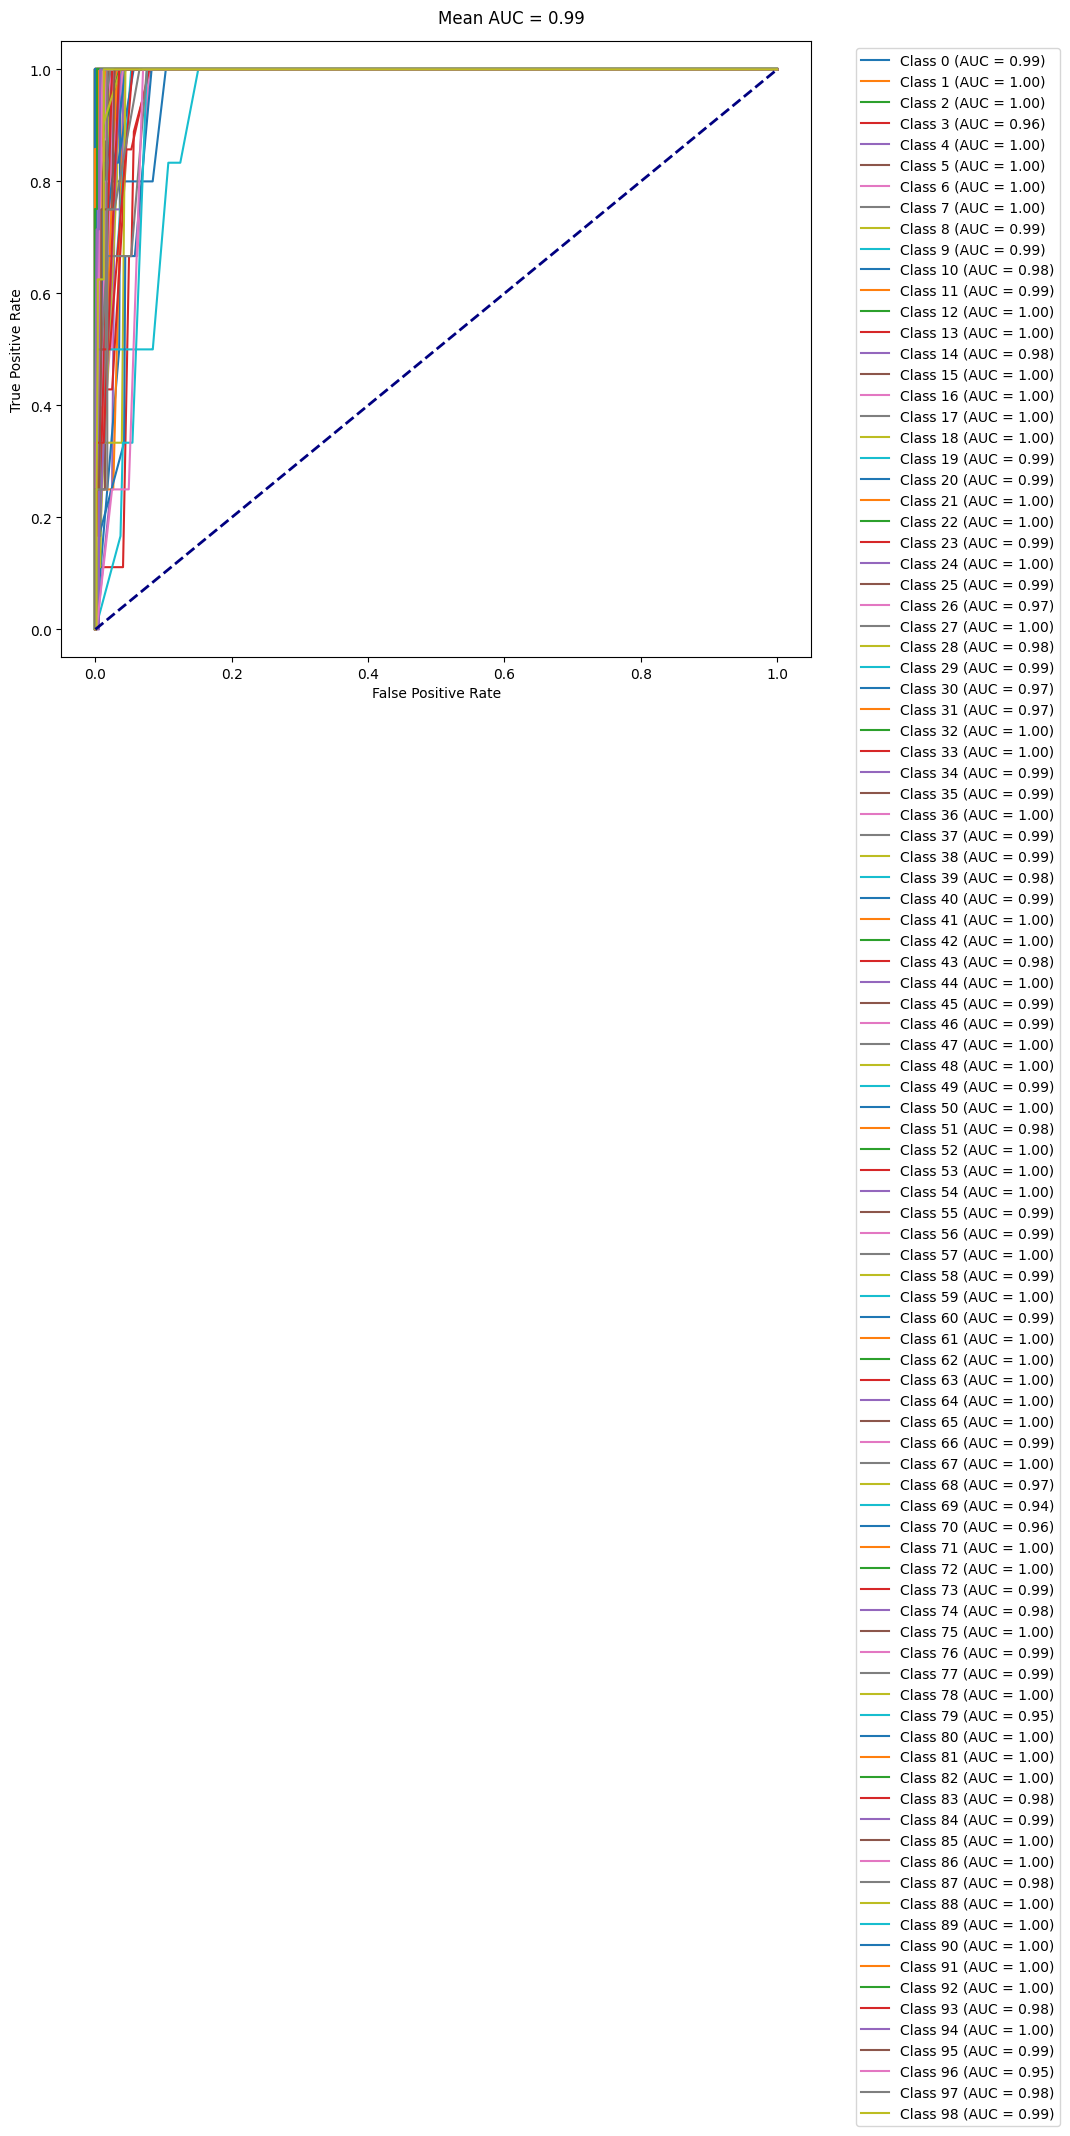

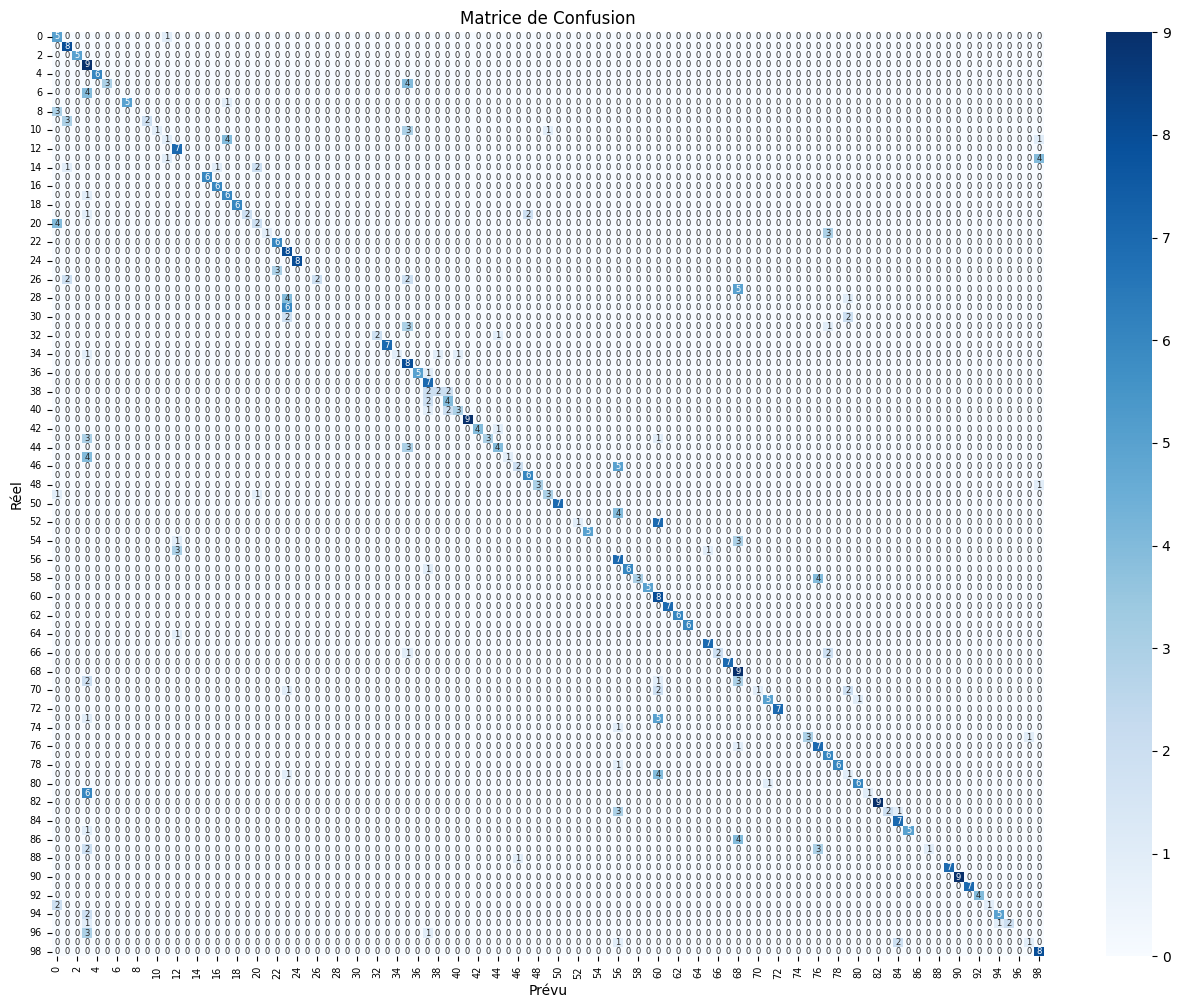

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Rapport de classification :
               precision    recall  f1-score   support

           0       0.33      0.83      0.48         6
           1       0.57      1.00      0.73         8
           2       1.00      1.00      1.00         5
           3       0.22      1.00      0.36         9
           4       1.00      1.00      1.00         6
           5       1.00      0.43      0.60         7
           6       0.00      0.00      0.00         4
           7       1.00      0.83      0.91         6
           8       0.00      0.00      0.00         3
           9       1.00      0.40      0.57         5
          10       1.00      0.20      0.33         5
          11       0.33      0.17      0.22         6
          12       0.58      1.00      0.74         7
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00         6
          16       0.86      1.00      0.92         

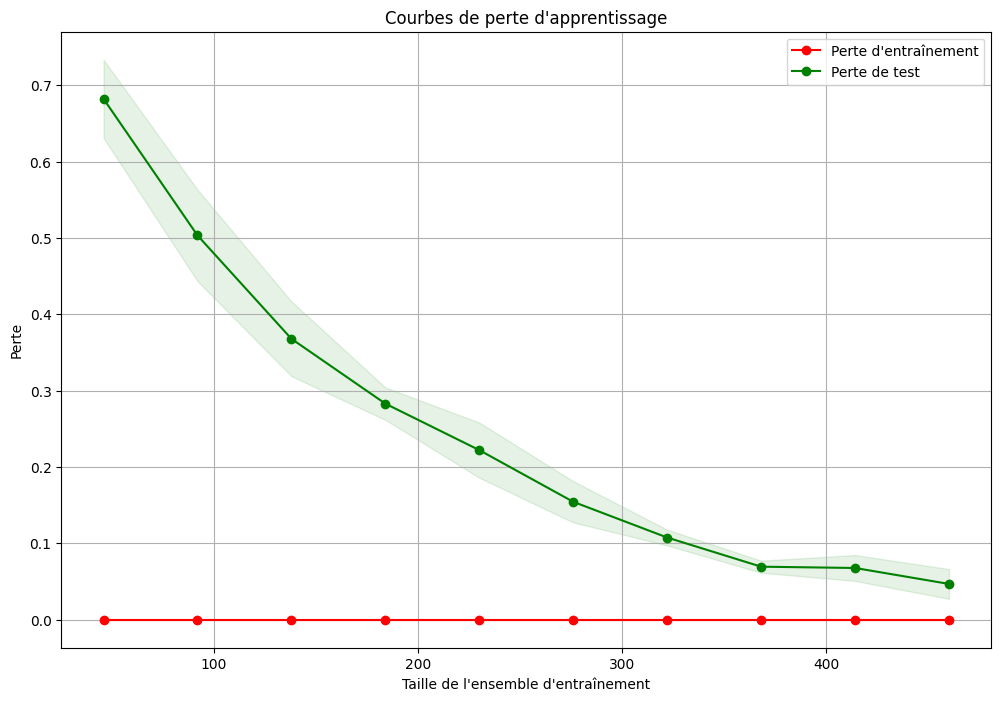

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


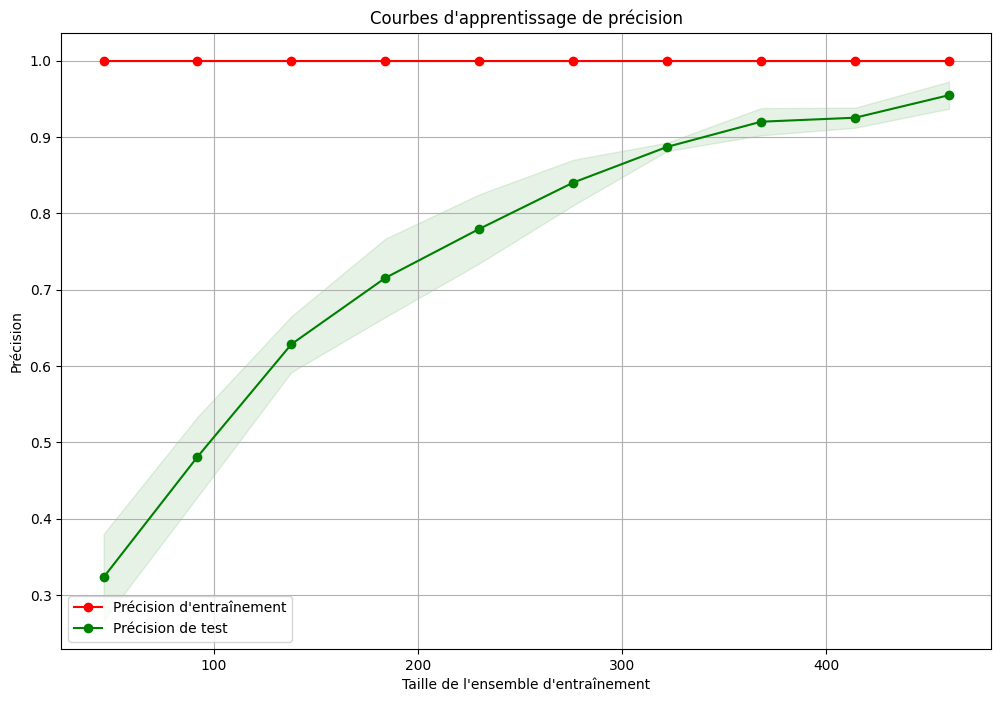

In [ ]:
evaluation_ab = Evaluation(adaboost_model.ab_classifier, adaboost_model.x_test, adaboost_model.y_test,adaboost_model.x_train,adaboost_model.y_train)
f1, precision, recall = evaluation_ab.calculate_metrics(adaboost_model.y_test, adaboost_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix()
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_fa.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_fa.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Reseaux de neurones


In [ ]:
model_R_N = Reseaux_de_neurones(x_train, y_train, x_val, y_val, x_test, y_test)
model_R_N.preprocess_data()
model_R_N.validation_croisee_gridsearch()
model_R_N.entrainement()
model_R_N.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([17, 22, 66, 14, 59, 43, 95, 15, 22, 47, 47, 21, 40, 15, 68, 93, 59,
       95, 59, 29, 51, 94,  4,  9, 61, 14, 19, 17, 21, 47, 38, 40, 58, 25,
       75, 42, 22,  3, 21, 96, 86, 36,  5, 35, 31, 12,  2, 48, 51, 49, 35,
        2, 85, 52, 26,  8, 30,  5, 56, 87, 16, 83, 54, 75, 34, 78, 43,  8,
       59, 53, 16, 89, 97, 39, 11, 63,  0, 66, 82, 92,  0, 65, 78, 31, 84,
       25, 94, 18, 70, 39, 13, 67, 17, 93, 55, 24,  4, 70, 91, 65, 25, 84,
       27, 37, 34, 97, 32, 30, 24, 32, 31, 96, 19, 42, 58, 25, 50, 84, 29,
       30, 49, 51,  7, 19, 83, 36, 26, 21, 80, 52, 89, 85, 53, 48, 20, 70,
       14, 77, 33, 48,  6, 38, 95, 70, 80, 33, 71,  0, 37, 71, 30, 85, 91,
       55, 45, 81, 42, 31, 54,  6,  0, 93, 96, 60, 73, 86, 26, 62, 22,  9,
       12, 71, 37, 32,  5, 57,  9, 65, 66, 83, 45, 10, 92, 22, 13, 77, 87,
        6, 18, 79, 44, 97, 45])

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.9870, Precision: 0.9933, Recall: 0.9845


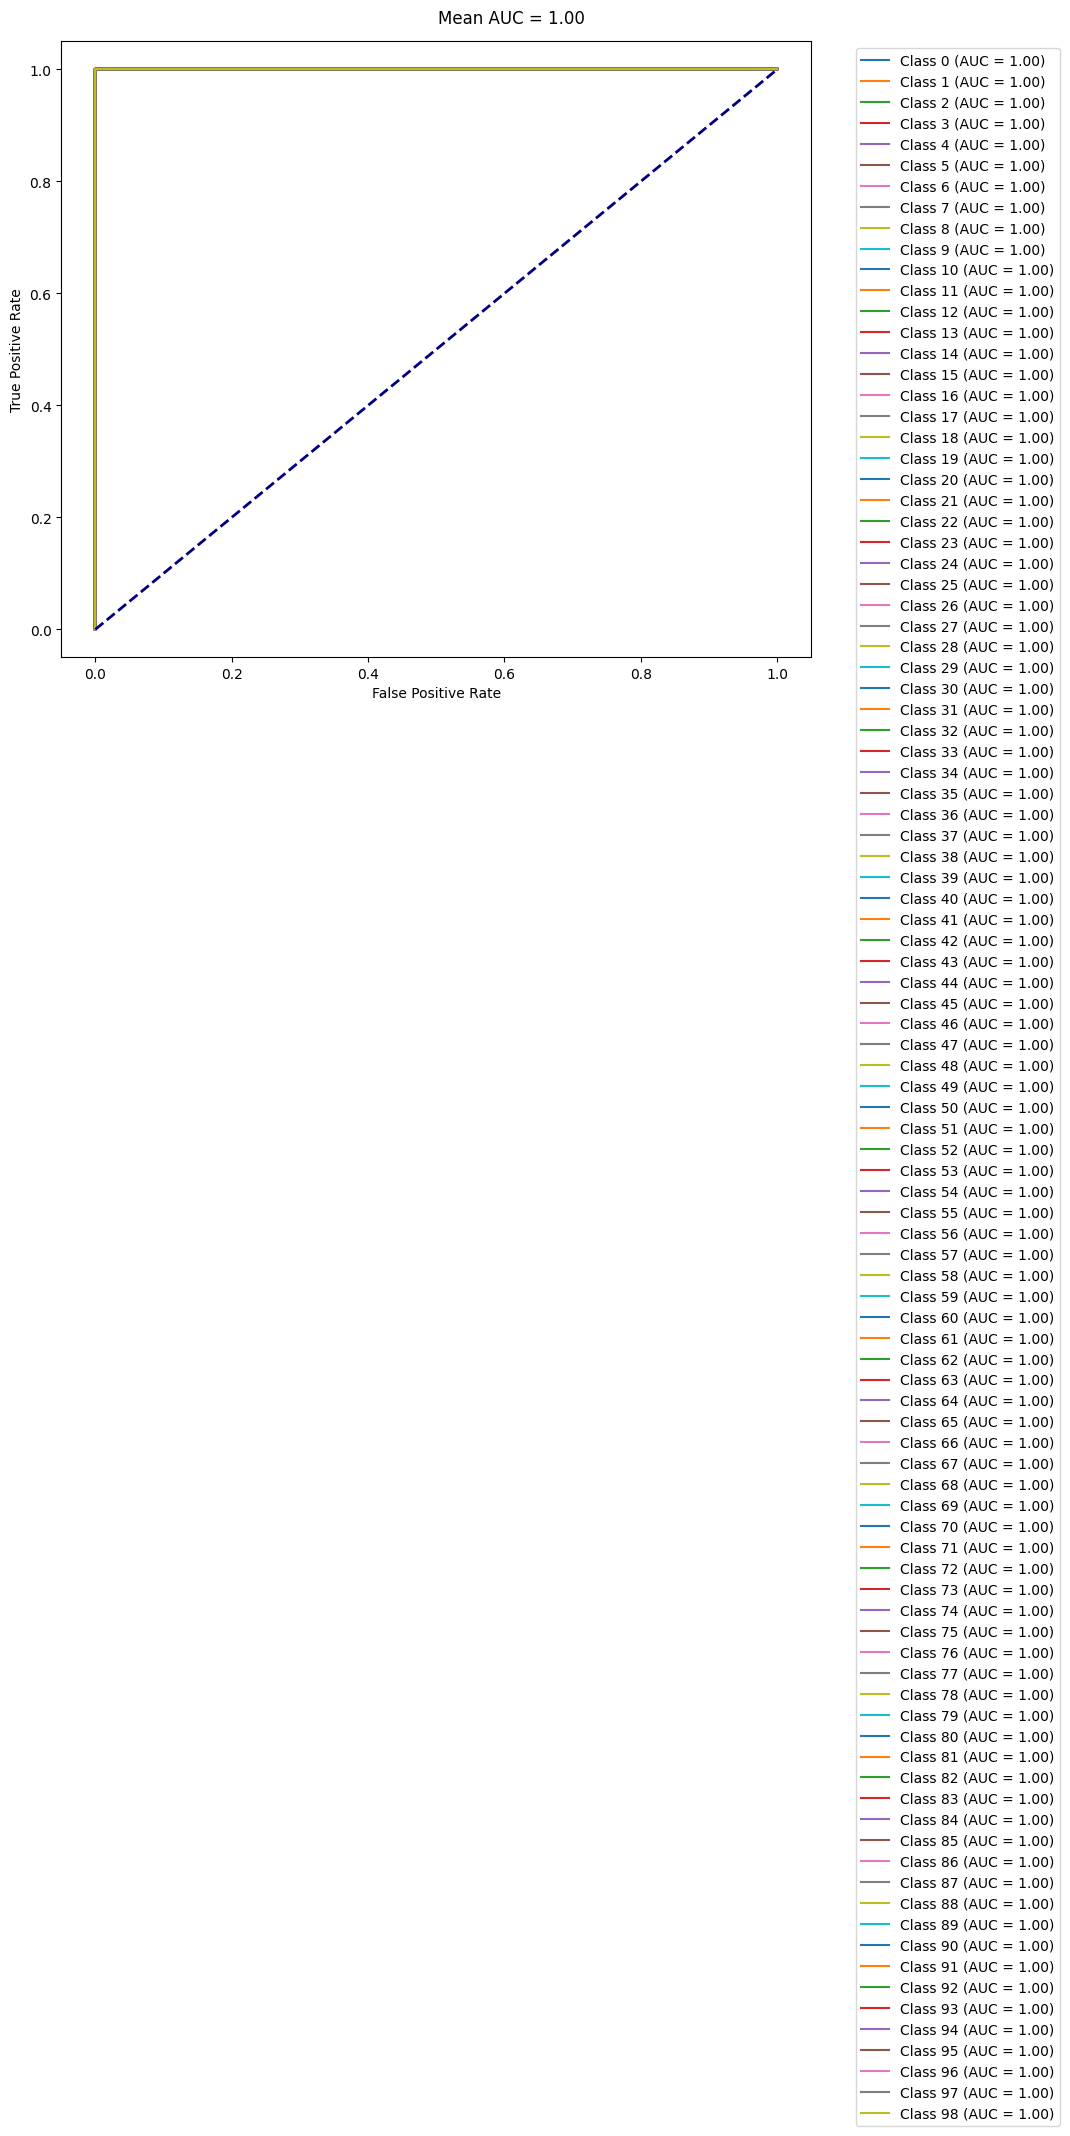

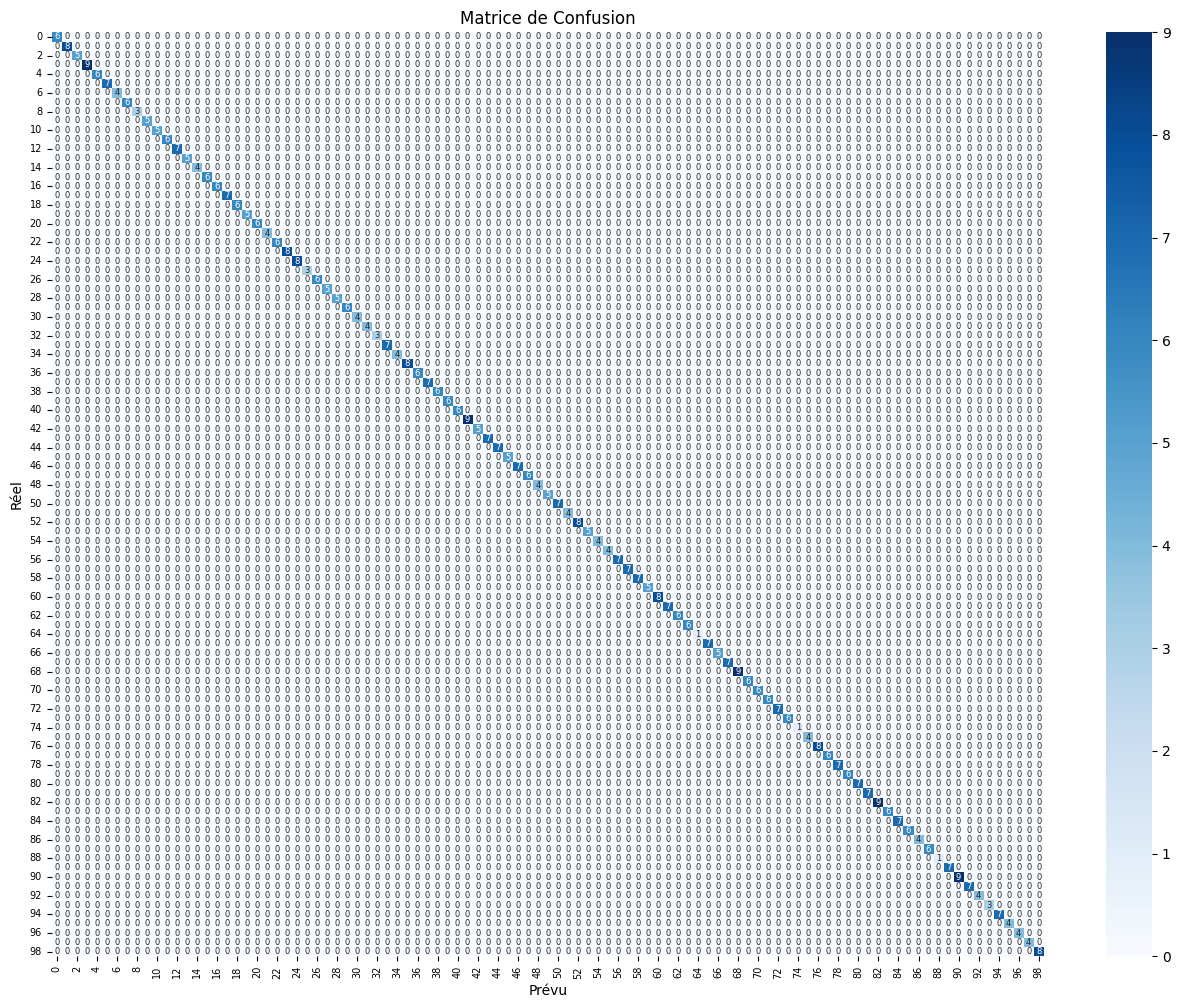

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

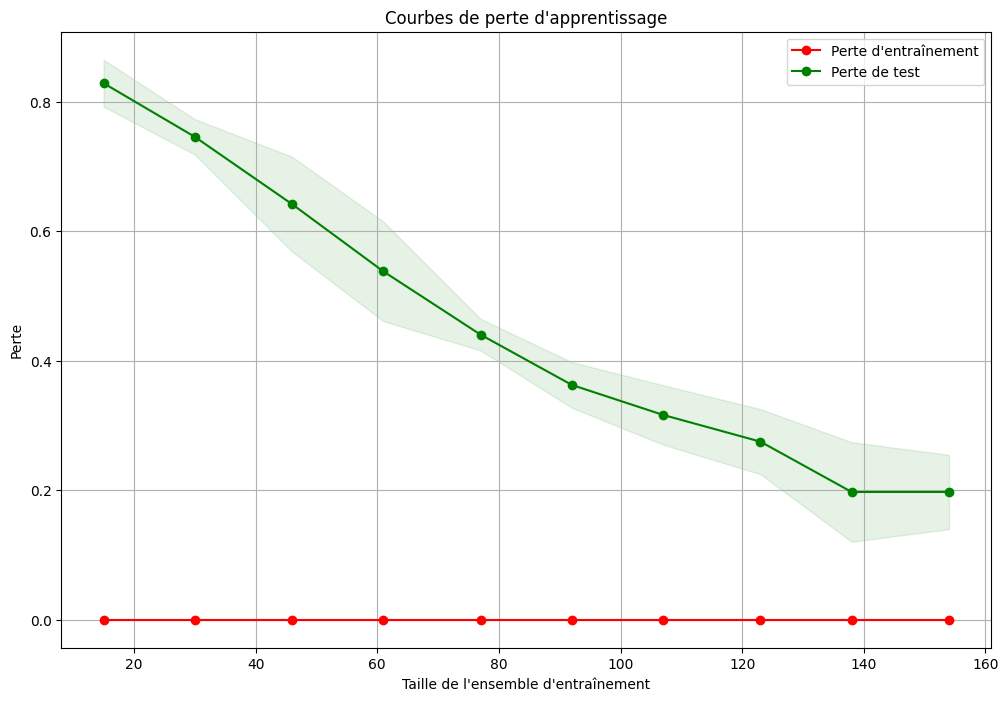

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

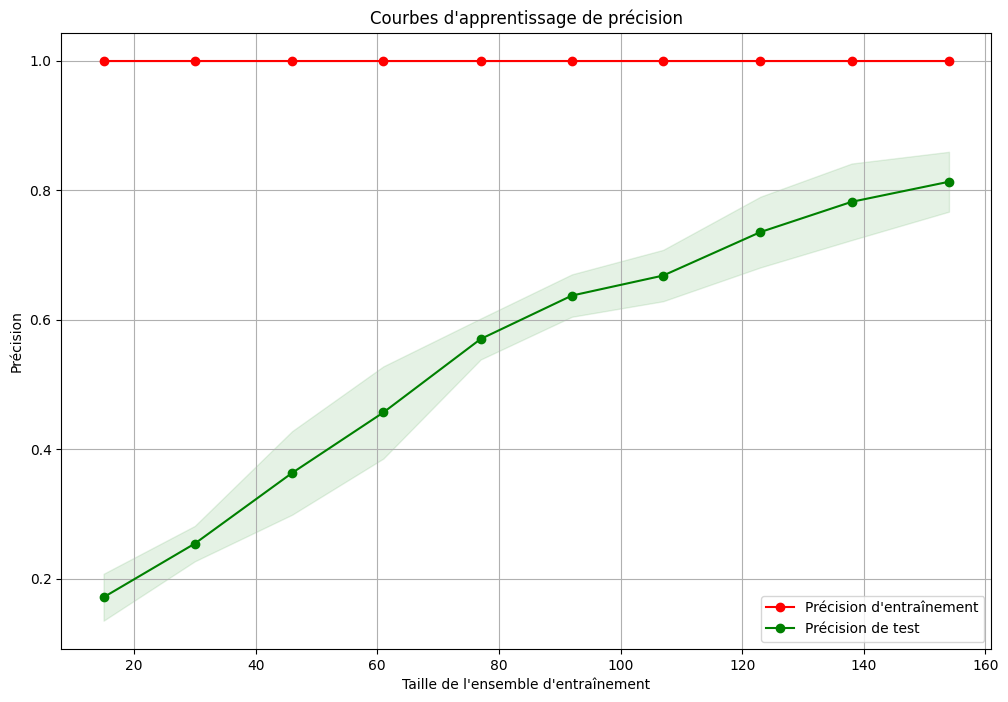

In [ ]:
evaluation_rn = Evaluation(model_R_N.nn_classifier, model_R_N.x_test, model_R_N.y_test,model_R_N.x_train,model_R_N.y_train)
f1, precision, recall = evaluation_rn.calculate_metrics(model_R_N.y_test, model_R_N.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_rn.plt_roc_curve()
evaluation_rn.plt_confusion_matrix()
evaluation_rn.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_rn.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_rn.plot_learning_curves_accuracy(train_sizes=train_sizes)


In [ ]:
print("Best hyperparameters:", model_R_N.best_hyperparameters)

Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01}


##### Bagging

In [ ]:
bagging_classifier = Bagging(x_train, y_train, x_val, y_val, x_test, y_test)
bagging_classifier.validation_croisee_gridsearch()
bagging_classifier.entrainement()
predictions = bagging_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.1866, Precision: 0.2009, Recall: 0.2383


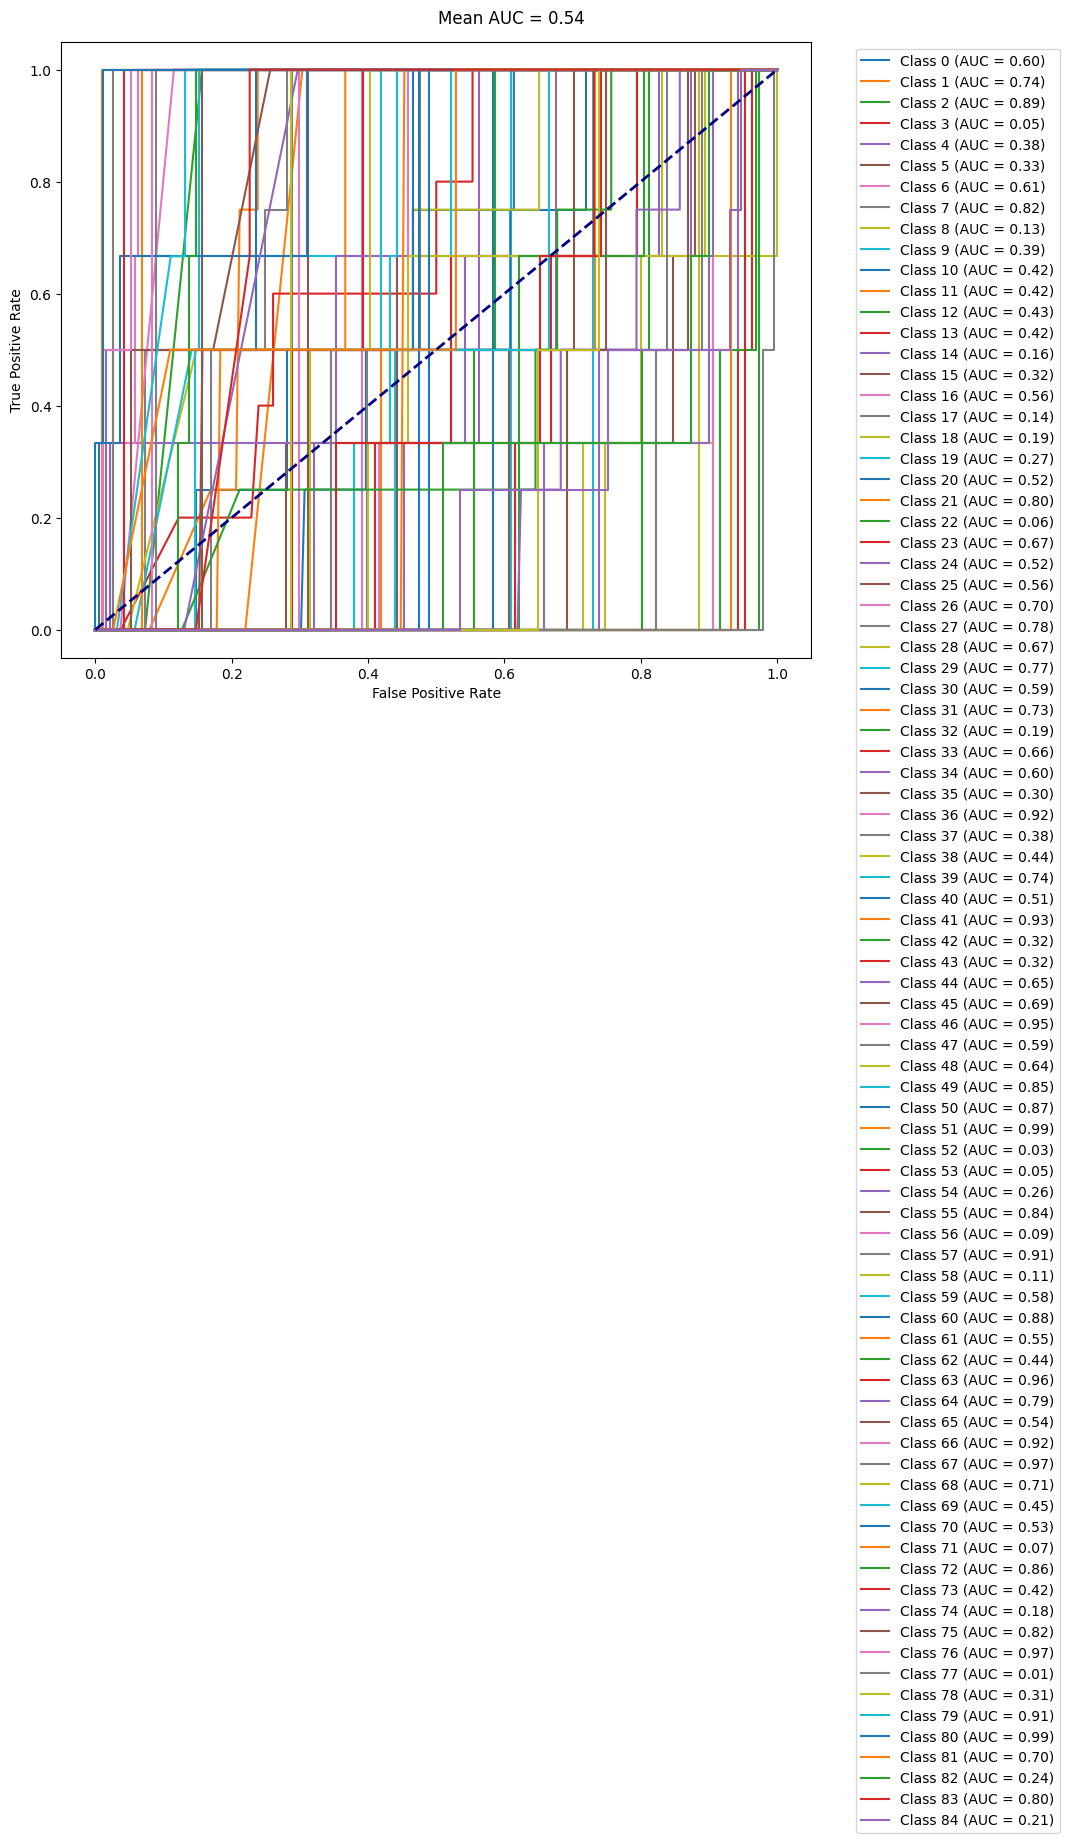

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.03      1.00      0.05         1
           4       0.50      0.50      0.50         2
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         3
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.25      1.00      0.40         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         

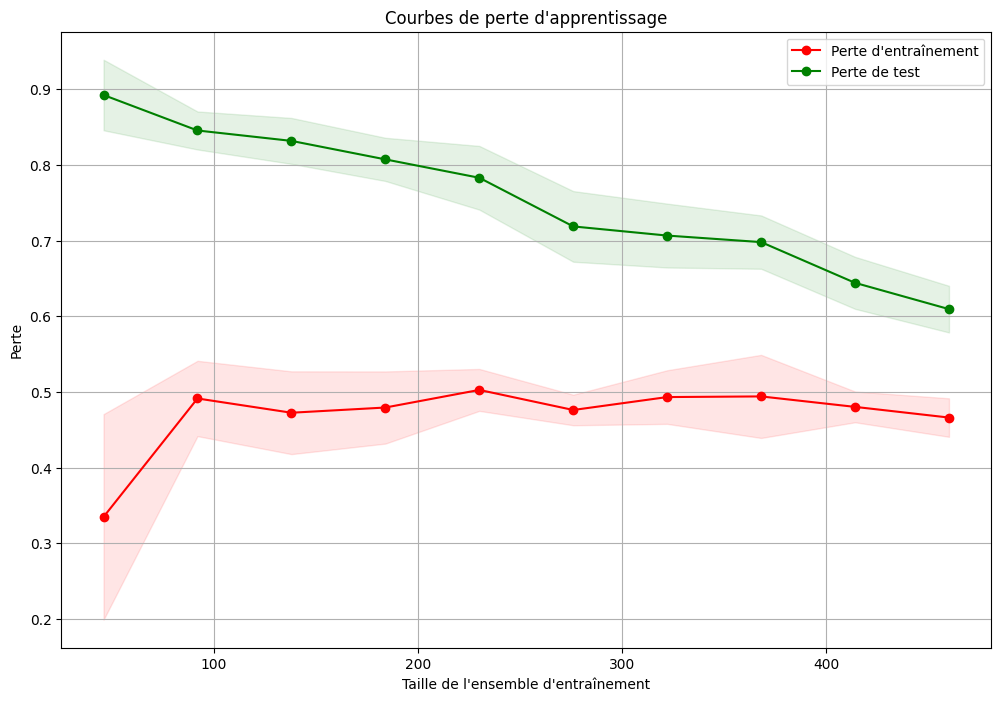

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


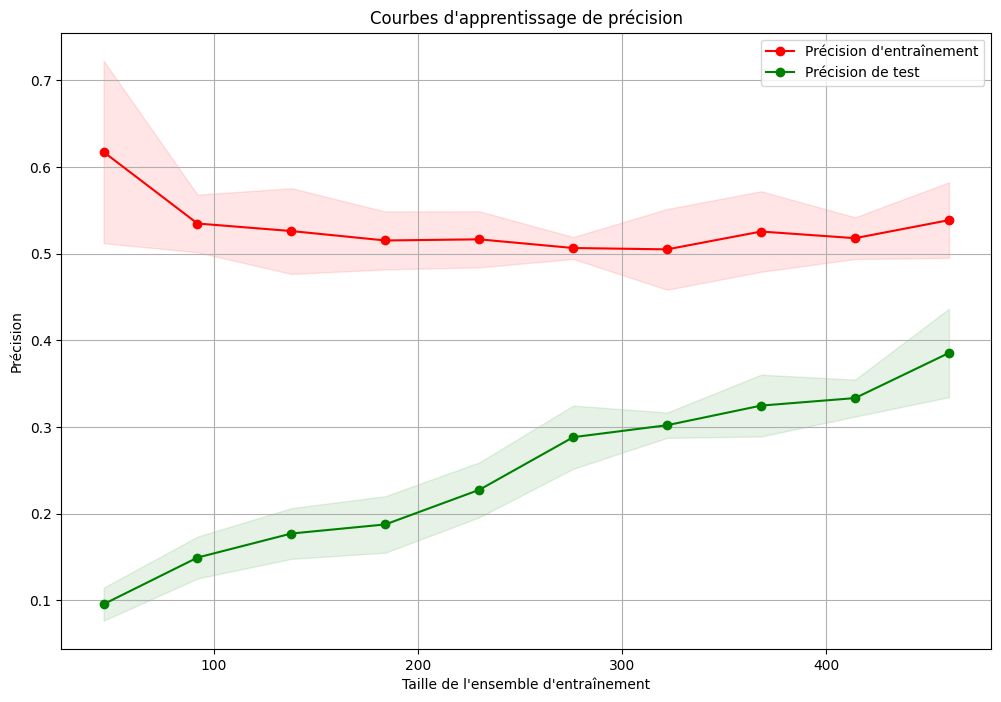

In [ ]:
evaluation_bg = Evaluation(model=bagging_classifier.bg_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation_bg.calculate_metrics(bagging_classifier.y_test, bagging_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_bg.plt_roc_curve()
evaluation_bg.plt_confusion_matrix()
evaluation_bg.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_bg.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_bg.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### KNN

In [ ]:
KNN_classifier = Knn(x_train, y_train, x_val, y_val, x_test, y_test)
KNN_classifier.validation_croisee_gridsearch()
KNN_classifier.entrainement()
predictions = KNN_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


F1 Score: 0.7867, Precision: 0.8554, Recall: 0.7876


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


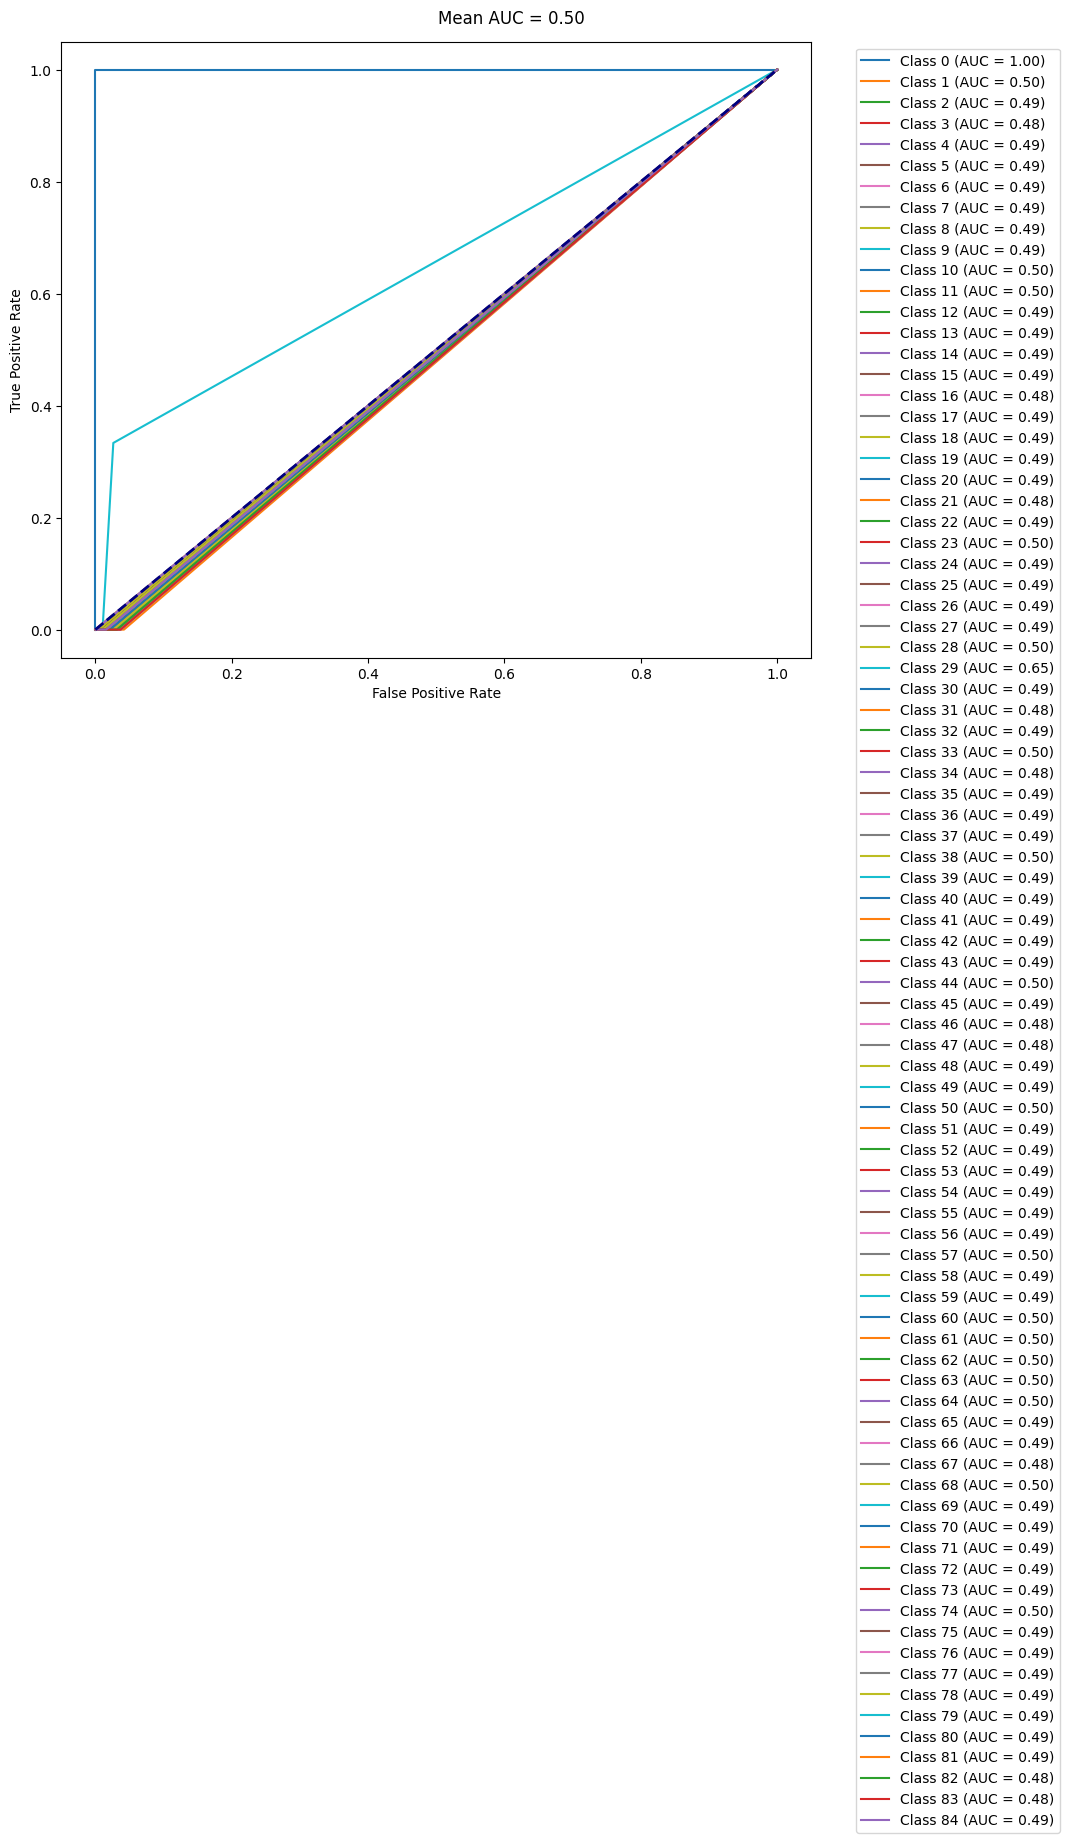

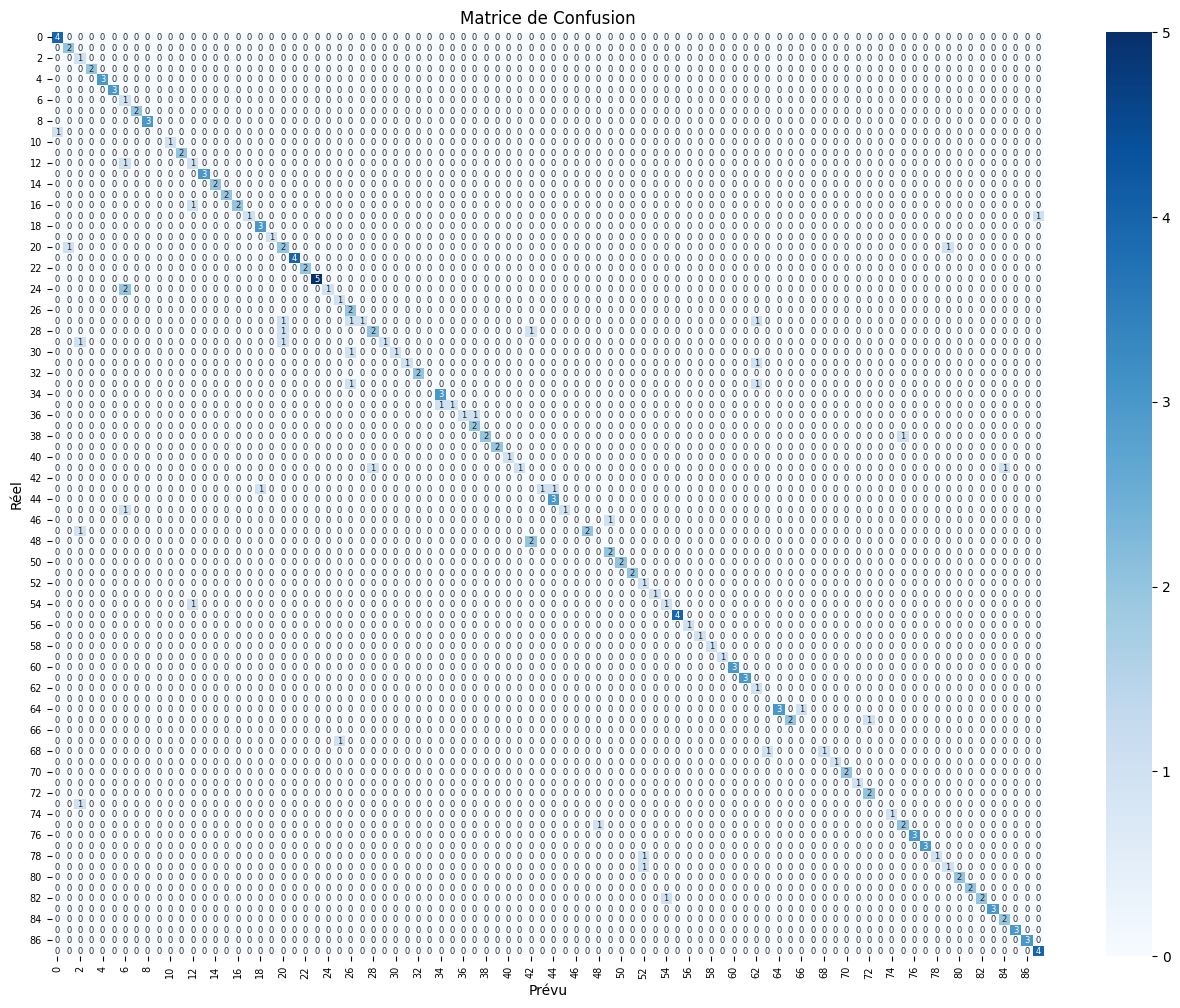

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         2
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.20      1.00      0.33         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.33      0.50      0.40         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      0.67      0.80         

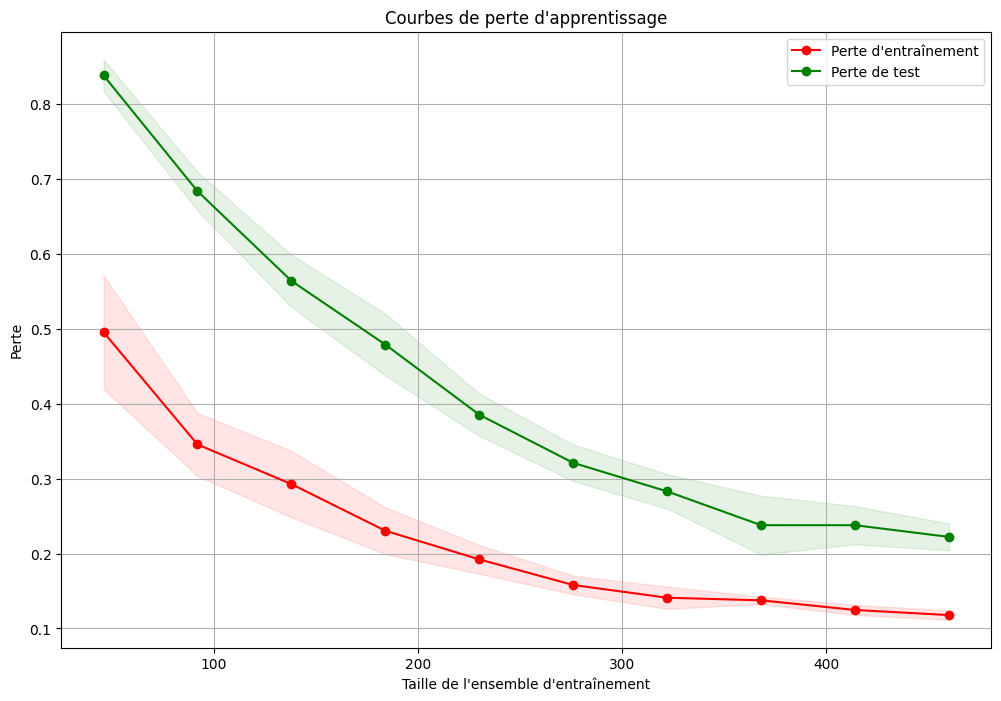

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


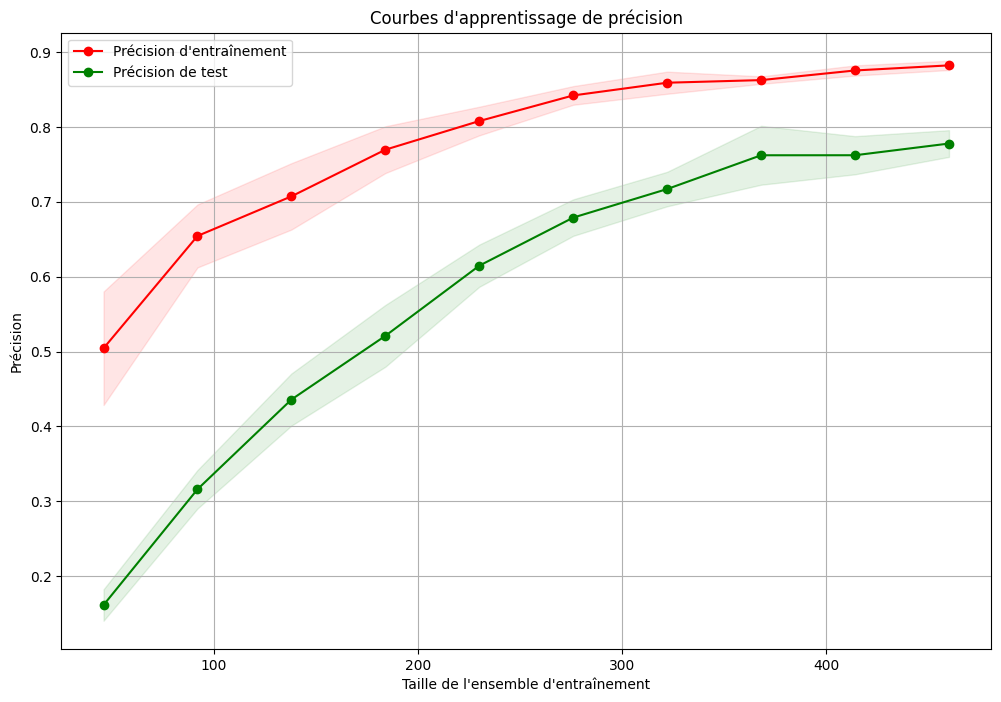

In [ ]:
evaluation_knn = Evaluation(KNN_classifier.knn_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_knn.calculate_metrics(KNN_classifier.y_test, KNN_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_knn.plt_roc_curve()
evaluation_knn.plt_confusion_matrix()
evaluation_knn.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_knn.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_knn.plot_learning_curves_accuracy(train_sizes=train_sizes)

##### Perceptron

In [ ]:
Perceptron_classifier = Perceptron_model(x_train, y_train, x_val, y_val, x_test, y_test)
Perceptron_classifier.validation_croisee_gridsearch()
Perceptron_classifier.entrainement()
predictions = Perceptron_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 1e-05}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 1e-05}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7174, Precision: 0.7534, Recall: 0.7513
Model does not support predict_proba method


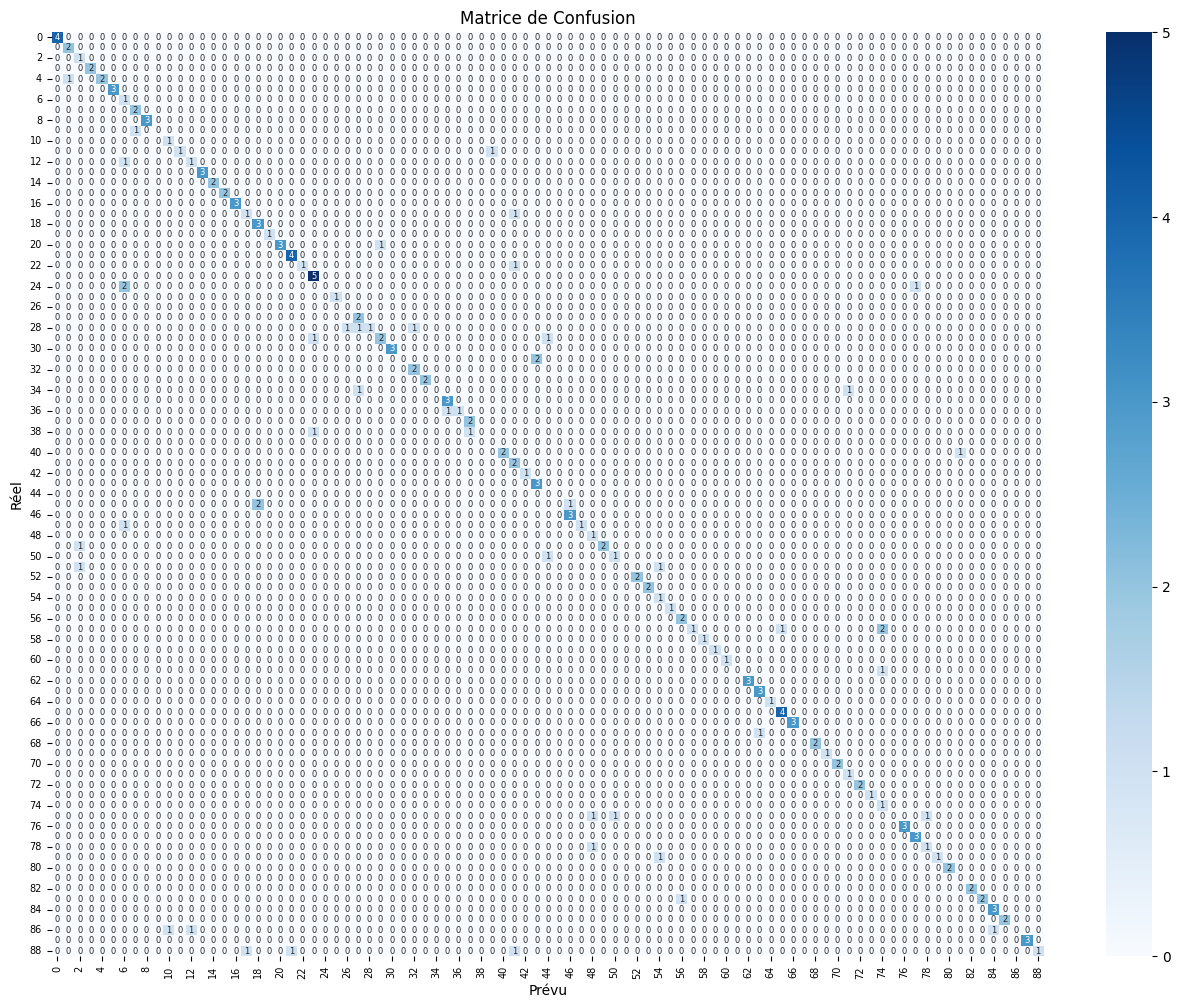

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       0.20      1.00      0.33         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         

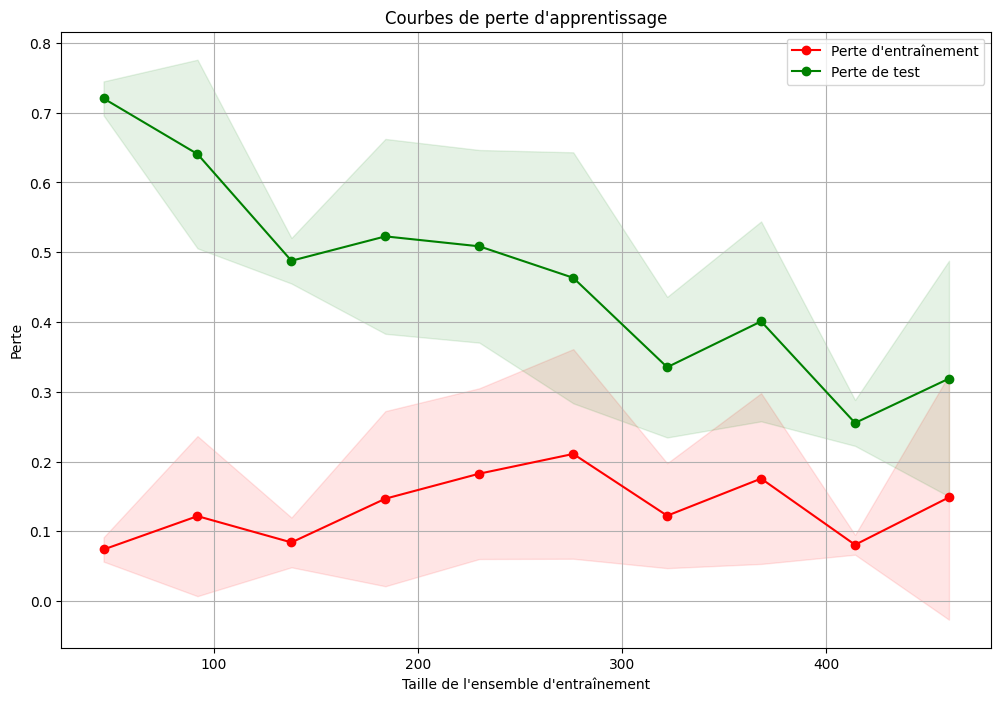

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


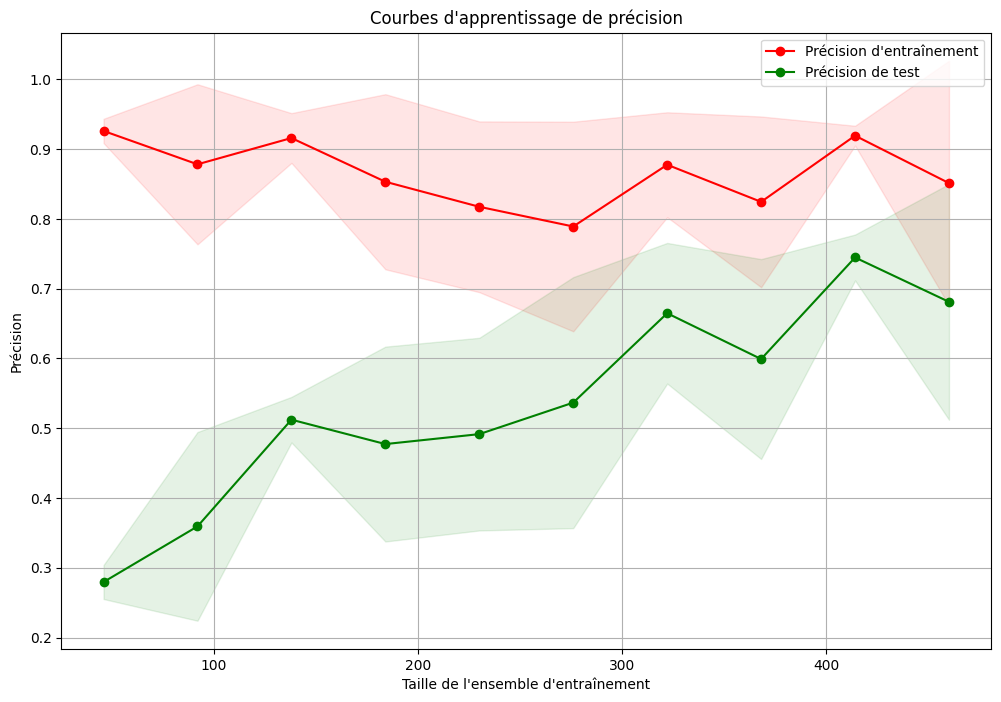

In [ ]:
evaluation_P = Evaluation(Perceptron_classifier.perceptron_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_P.calculate_metrics(Perceptron_classifier.y_test, Perceptron_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_P.plt_roc_curve()
evaluation_P.plt_confusion_matrix()
evaluation_P.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_P.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_P.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Logistic regression

In [ ]:
RL_classifier = LogisticRegression_model(x_train, y_train, x_val, y_val, x_test, y_test)
RL_classifier.validation_croisee_gridsearch()
RL_classifier.entrainement()
predictions = RL_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.6280, Precision: 0.6948, Recall: 0.6425


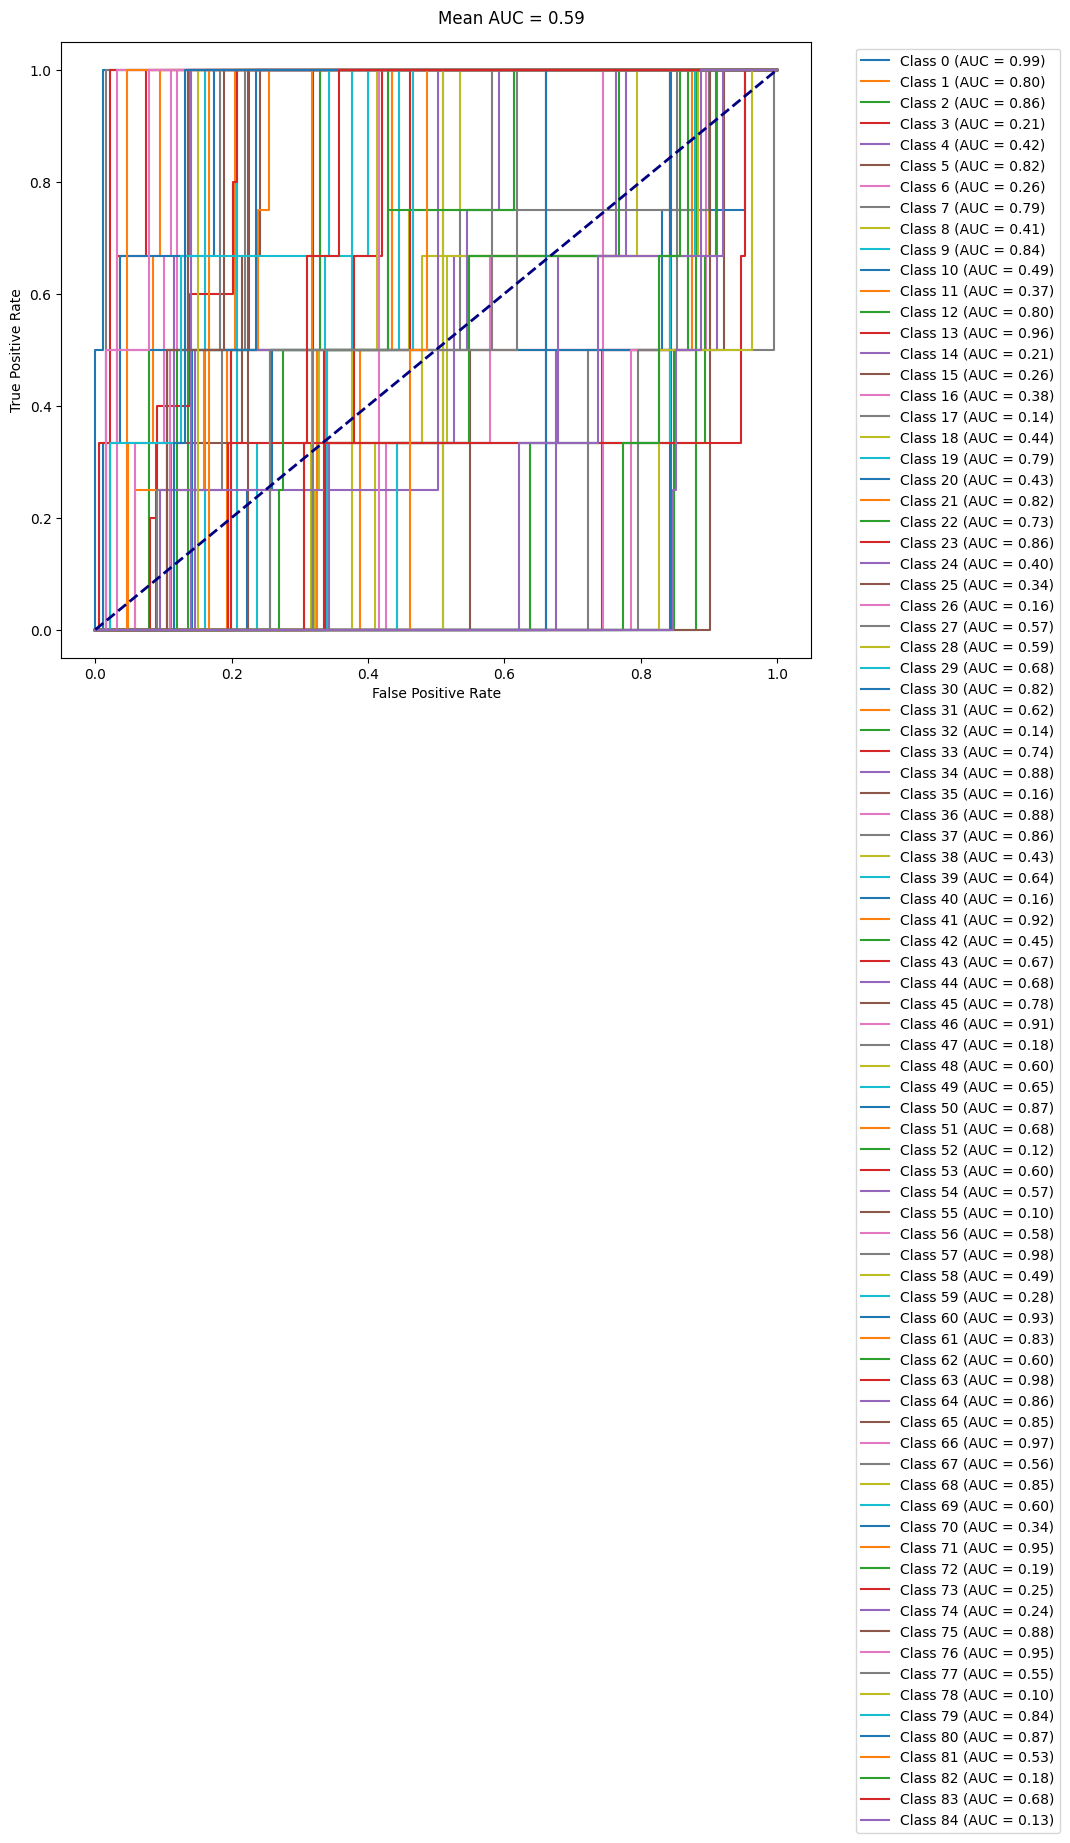

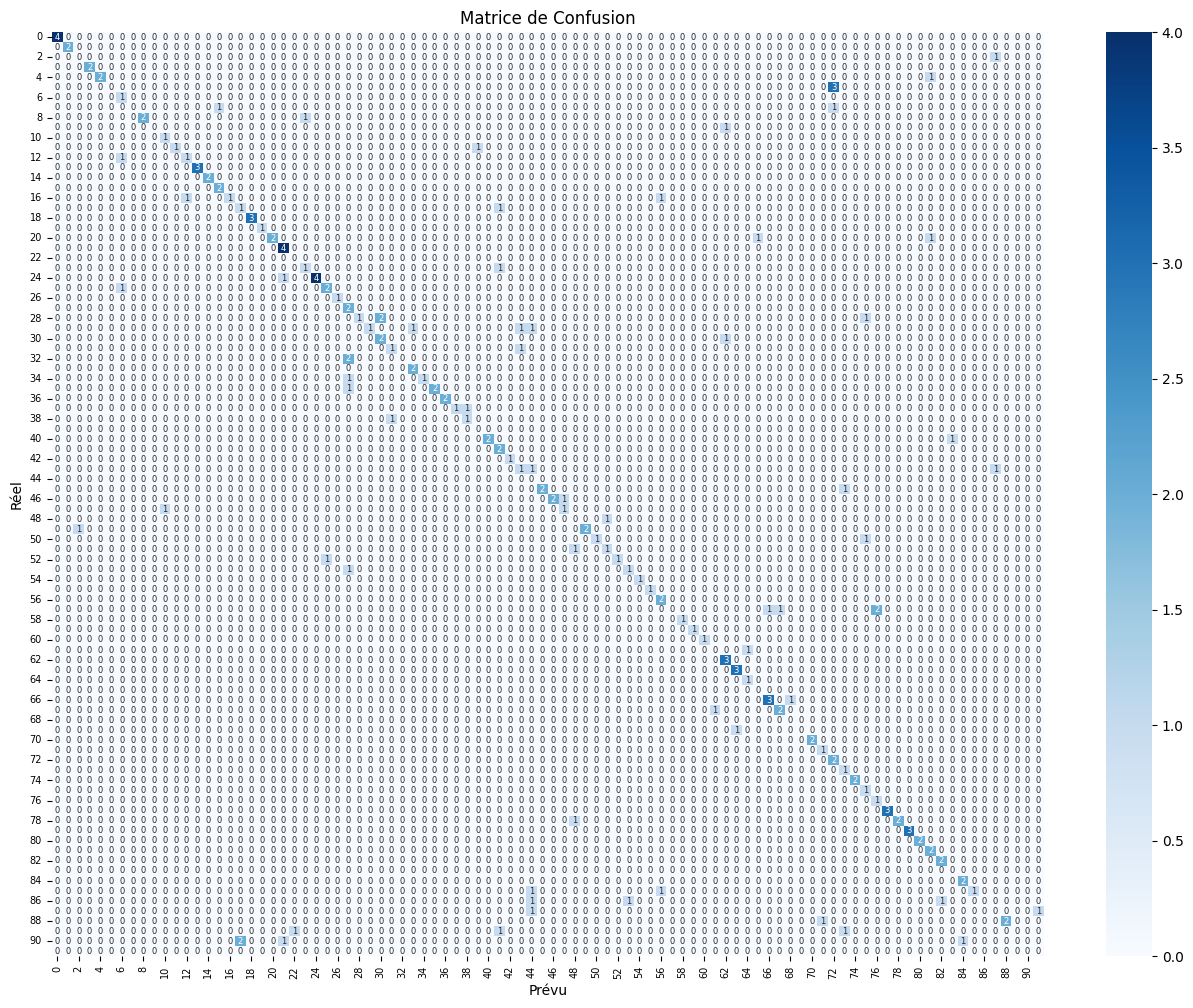

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.33      1.00      0.50         1
           8       0.00      0.00      0.00         2
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      0.33      0.50         

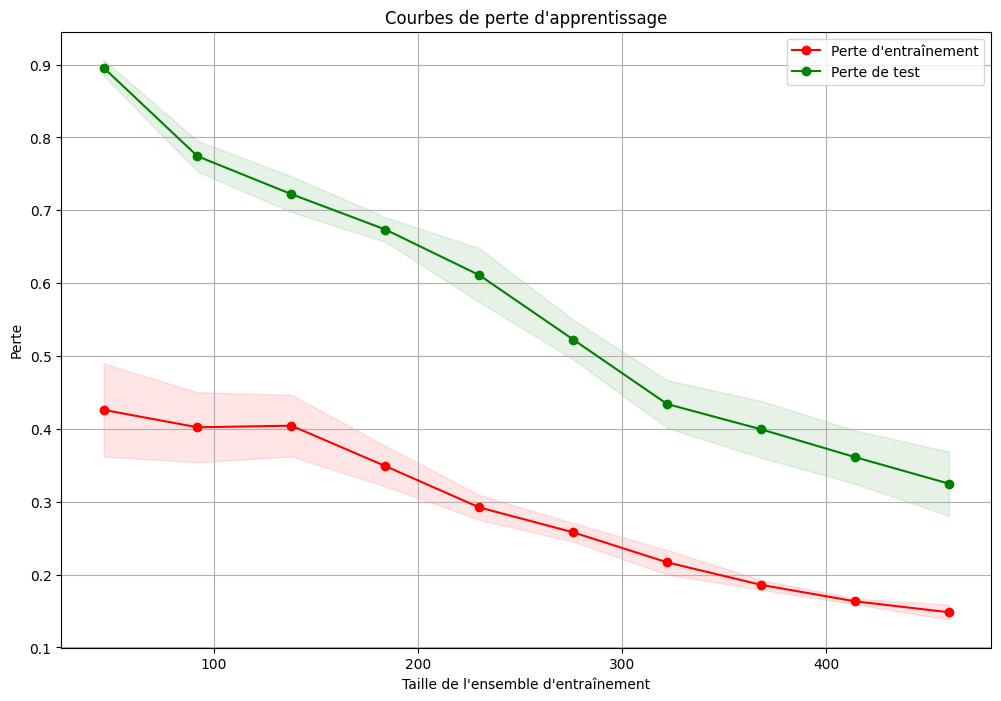

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


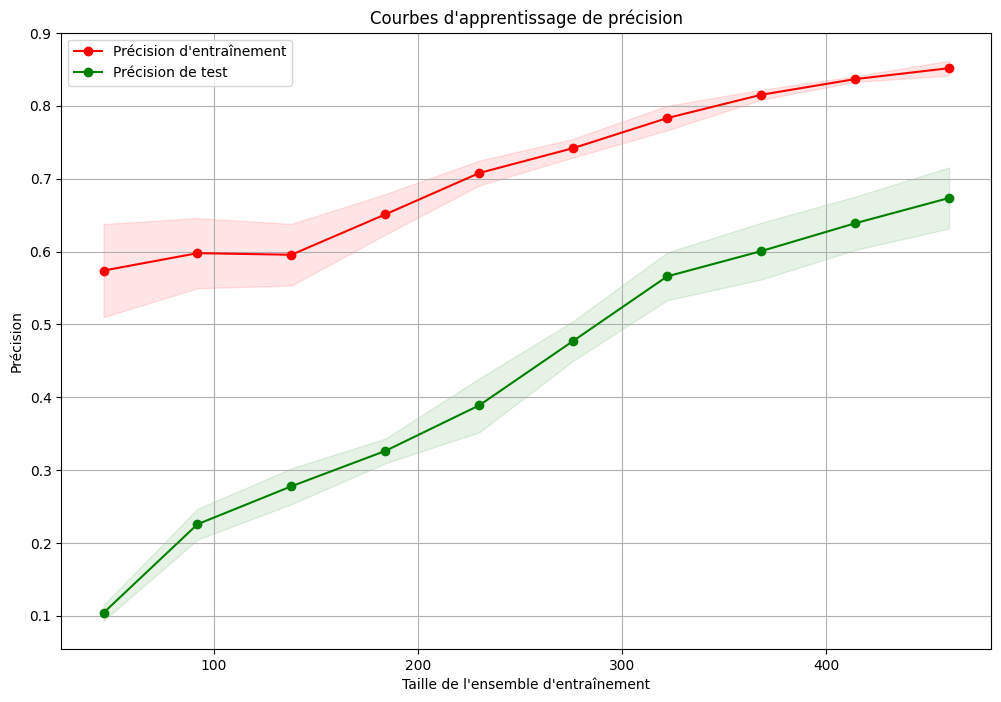

In [ ]:
evaluation_RL = Evaluation(RL_classifier.logistic_regression_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_RL.calculate_metrics(RL_classifier.y_test, RL_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_RL.plt_roc_curve()
evaluation_RL.plt_confusion_matrix()
evaluation_RL.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_RL.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_RL.plot_learning_curves_accuracy(train_sizes=train_sizes)


In [ ]:
classifieurs = {'Foret aleatoire': model_foret_alea, 'SVM': svm_model, 'Arbre de decision': Arbre_de_decision_model, 'Adaboost': adaboost_model, 'Reseaux de neurone': model_R_N, 'Bagging': bagging_classifier, 'KNN': KNN_classifier,'Logistic regression': RL_classifier}

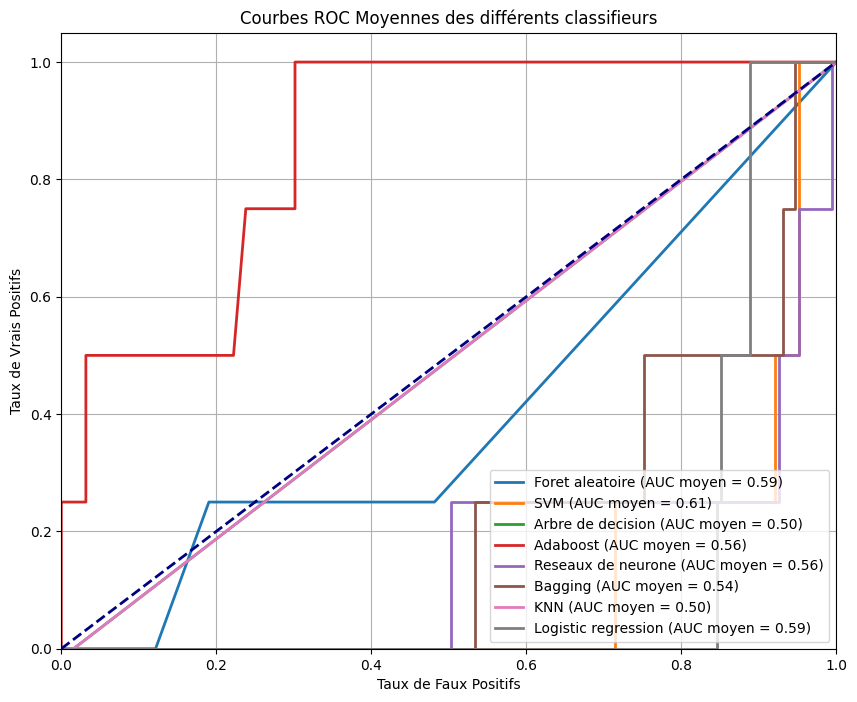

In [ ]:
Evaluation.tracer_courbes_roc(classifieurs, y_test)